# Implementation of a general Neural Network based on Gradient Descent and main Optimization Algorithms

In this notebook we'll implement a general Neural Network based on the Gradient Descent Algorithm (GD) and with different optimization algorithms, using Object-oriented programming with Python and the following packages: Numpy and Matplotlib.

In [1]:
# Import numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import also graphviz to implement a diagram of a neural network
import graphviz

Before to implement a neural network, we'll need to specify the notation of which we'll make use. In following is showed a diagram of a Deep Neural Network

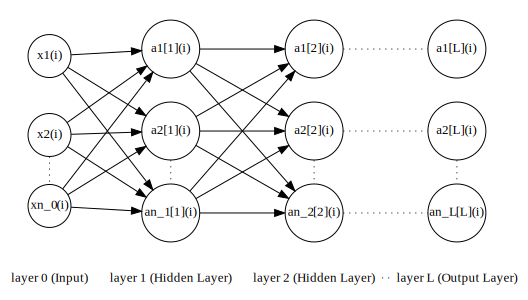

In [2]:
g = graphviz.Digraph('Deep Neural Network')

g.graph_attr["splines"]='line'
g.graph_attr['rankdir']='LR'
g.edge_attr['style'] = 'solid'

with g.subgraph(name='layers') as c:
    c.node(name='l0',label='layer 0 (Input)', rank='same', group='g1')
    c.node(name='l1',label='layer 1 (Hidden Layer)')
    c.node(name='l2',label='layer 2 (Hidden Layer)')
    c.node(name='lL',label='layer L (Output Layer)')
    c.node_attr.update(shape='plaintext')
    c.attr(style='invis')
    c.edges([('l0','l1'),('l1','l2')])
    c.edge_attr['style']='invis'
    c.edge_attr['len']='0.2'
    c.edge('l2', 'lL', style='dotted', arrowhead='none')

with g.subgraph(name='cluster 0') as c:
    c.node(name='x1',label='<x<sub>1</sub><sup>(i)</sup>>', rank='same', group='g1', width='.6')
    c.node(name='a1_1',label='<a<sub>1</sub><sup>[1](i)</sup>>', width='.8')
    c.node(name='a1_2',label='<a<sub>1</sub><sup>[2](i)</sup>>', width='.8')
    c.node(name='a1_L',label='<a<sub>1</sub><sup>[L](i)</sup>>', width='.8')
    c.node_attr.update(style='solid', color='black', shape='circle', fixedsize='True')
    c.attr(style='filled')
    c.attr(color='white')

with g.subgraph(name='cluster 1') as c:
    c.node(name='x2',label='<x<sub>2</sub><sup>(i)</sup>>', width='.6')
    c.node(name='a2_1',label='<a<sub>2</sub><sup>[1](i)</sup>>', width='.8')
    c.node(name='a2_2',label='<a<sub>2</sub><sup>[2](i)</sup>>', width='.8')
    c.node(name='a2_L',label='<a<sub>2</sub><sup>[L](i)</sup>>', width='.8')
    c.node_attr.update(style='solid', color='black', shape='circle', fixedsize='True')
    c.attr(style='filled')
    c.attr(color='white')
    
with g.subgraph(name='cluster 2') as c:
    c.node(name='xn',label='<x<sub>n_0</sub><sup>(i)</sup>>', group='g1', width='.6')
    c.node(name='an_1',label='<a<sub>n_1</sub><sup>[1](i)</sup>>', width='.8')
    c.node(name='an_2',label='<a<sub>n_2</sub><sup>[2](i)</sup>>', width='.8')
    c.node(name='an_L',label='<a<sub>n_L</sub><sup>[L](i)</sup>>', width='.8')
    c.node_attr.update(style='solid', color='black', shape='circle', fixedsize='True')
    c.attr(style='filled')
    c.attr(color='white')

g.edges([('x1','a1_1'),('x1','a2_1'),('x1','an_1')])
g.edges([('x2','a1_1'),('x2','a2_1'), ('x2','an_1')])
g.edges([('xn','a1_1'),('xn','a2_1'),('xn','an_1')])

g.edges([('a1_1','a1_2'),('a1_1','a2_2'), ('a1_1','an_2')])
g.edges([('a2_1','a1_2'),('a2_1','a2_2'), ('a2_1','an_2')])
g.edges([('an_1','a1_2'),('an_1','a2_2'), ('an_1','an_2')])

g.edge('a1_2','a1_L', style='dotted', arrowhead='none')
g.edge('a2_2','a2_L', style='dotted', arrowhead='none')
g.edge('an_2','an_L', style='dotted', arrowhead='none')

g.edge('x2', 'xn', style='dotted', arrowhead='none')
g.edge('a2_1', 'an_1', style='dotted', arrowhead='none')
g.edge('a2_2', 'an_2', style='dotted', arrowhead='none')
g.edge('a2_L', 'an_L', style='dotted', arrowhead='none')
g.node_attr.update(fontsize='13')
g.attr(ranksep='0.1')

g

where $(i)$ refers to $i-th$ sample of $n_0$ variables $(x_1^{(i)}, ... x_{n_0}^{(i)})$.
In the showed diagram there are $L$ layers, excluding the layer $0$ associated with the Input data. In the $l-th$ layer we'll indicate with $n_l$ the number of neurons.

The input of a neuron in the $l-th$ layer $z_j^{l}$ is related to the outputs of neurons of the previous layer $a_1^{[l-1](i)}, \dots, a_{n_{l-1}}^{[l-1](i)}$ by $weights$ $W_{j 1}^{[l]}, \dots, W_{j n_{l-1}}^{[l]}$ and $bias$ $b_j^{[l]}$, while the output $a_j^{[l](i)}$ is given by the $activation\mbox{ }function$ $g^{[l]} $ as follows:

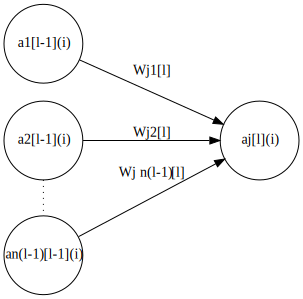

In [3]:
g = graphviz.Digraph('Neuron')

g.graph_attr["splines"]='line'
g.graph_attr['rankdir']='LR'
g.edge_attr['style'] = 'solid'

g.node(name='a1_l-1',label='<a<sub>1</sub><sup>[l-1](i)</sup>>', width='1.1')
g.node(name='a2_l-1',label='<a<sub>2</sub><sup>[l-1](i)</sup>>', width='1.1')
g.node(name='aj_l', label='<a<sub>j</sub><sup>[l](i)</sup>>', width='1.1')
g.node(name='an_l-1',label='<a<sub>n(l-1)</sub><sup>[l-1](i)</sup>>', width='1.1')

g.node_attr.update(style='solid', color='black', shape='circle', fixedsize='True')

g.edge('a1_l-1','aj_l', label='<W<sub>j1</sub><sup>[l]</sup>>')
g.edge('a2_l-1','aj_l', label='<W<sub>j2</sub><sup>[l]</sup>>')
g.edge('an_l-1','aj_l', label='<W<sub>j n(l-1)</sub><sup>[l]</sup>>')
g.attr(ranksep='1.0')
g.edge('a2_l-1', 'an_l-1', style='dotted', arrowhead='none', constraint='false')

g



$a_j^{[l](i)} = g^{[l]}(z_j^{[l](i)}) \Rightarrow$ $g^{[l]}$ : activation function of $j-th$ neuron in $l-th$ layer

$z_j^{[l](i)} = \sum_{i=1}^{n_{l-1}}W_{j i}^{[l]}a_i^{[l-1](i)} + b_j^{[l]} \Rightarrow$ linear activation of $j-th$ neuron in $l-th$ layer

$W_{j i}^{[l]} \Rightarrow$ weight between $j-th$ neuron in $l-th$ layer and $i-th$ neuron in $(l-1) -th$ layer

$b_j^{[l]} \Rightarrow$ bias of $j-th$ neuron in $l-th$ layer

Now for each layer in vector form we have:

$b^{[l]} = \begin{bmatrix}
    b_1^{[l]} \\
    \vdots \\
    b_{n_l}^{[l]}
\end{bmatrix}\>
$
$\Rightarrow shape = (n_l, 1)$,
  $\>\>\>W^{[l]} = \begin{bmatrix}
    W_{11}^{[l]} & \cdots & W_{1 n_{l-1}}^{[l]} \\
    \vdots & \ddots & \vdots \\
    W_{n_l 1}^{[l]} & \cdots & W_{n_l n_{l-1}}^{[l]}\\
\end{bmatrix}
$
$\Rightarrow shape = (n_l, n_{l-1})$

$z^{[l](i)} = \begin{bmatrix}
    z_1^{[l](i)} \\
    \vdots \\
    z_{n_l}^{[l](i)}
\end{bmatrix}\>
= W^{[l]}a^{[l-1](i)} + b^{[l]}
$
$\Rightarrow shape = (n_l, 1)$,
$\>\>\>a^{[l](i)} = g^{[l]}(z^{[l](i)})= \begin{bmatrix}
    a_1^{[l](i)} \\
    \vdots \\
    a_{n_l}^{[l](i)}
\end{bmatrix}\>
$
$\Rightarrow shape = (n_l, 1)$

Extending the notation to $n$-samples of $n_0$ features, the final notation will be:

$X = A^{[0]} = \begin{bmatrix}
    x_{1}^{(1)} & \cdots & x_{1}^{(n)} \\
    \vdots & \ddots & \vdots \\
    x_{n_0}^{(1)} & \cdots & x_{n_0}^{(n)}\\
\end{bmatrix}
$
$\Rightarrow shape = (n_0, n)$
$\>\>\>A^{[l]} = \begin{bmatrix}
    a_{1}^{[l](1)} & \cdots & a_{1}^{[l](n)} \\
    \vdots & \ddots & \vdots \\
    a_{n_l}^{[l](1)} & \cdots & a_{n_l}^{[l](n)}\\
\end{bmatrix}
$
$\Rightarrow shape = (n_l, n)$

$Z^{[l]} = \begin{bmatrix}
    z_{1}^{[l](1)} & \cdots & z_{1}^{[l](n)} \\
    \vdots & \ddots & \vdots \\
    z_{n_l}^{[l](1)} & \cdots & z_{n_l}^{[l](n)}\\
\end{bmatrix}
= W^{[l]}A^{[l-1]} + b^{[l]} \>\>(broadcasting)
$
$\Rightarrow shape = (n_l, n)$


Indicating with $Y$ the matrix of corrected outputs corresponding to $n$ samples of $n_0$ features

$$Y = \begin{bmatrix}
    y_{1}^{(1)} & \cdots & y_{1}^{(n)} \\
    \vdots & \ddots & \vdots \\
    y_{n_L}^{(1)} & \cdots & y_{n_L}^{(n)}\\
\end{bmatrix}$$

the general expression of $cost\mbox{ }function$ is the following:

$$J\left(W, b\right) = \dfrac{1}{n}\sum_{k=1}^n\zeta\left(A^{[L](k)}\left(X^{(k)}, W, b\right), Y^{(k)}\right) $$

where $\zeta\left(A^{[L](k)}\left(X^{(k)}, W, b\right), Y^{(k)}\right)$ is a $loss\mbox{ }function$, for example squared of errors
$$
\zeta\left(A^{[L](k)}\left(X^{(k)}, W, b\right), Y^{(k)}\right) = \dfrac{1}{2}\sum_{j=1}^{n_L}\left(y_j^{(k)} - a_j^{[L](k)}\left(X^{(k)}, W, b\right)\right)^2
$$
or the logistic function, in a case of binary classification
$$
\zeta\left(A^{[L](k)}\left(X^{(k)}, W, b\right), Y^{(k)}\right) = -\sum_{j=1}^{n_L}\left(y_j^{(k)}ln(a_j^{[L](k)}\left(X^{(k)}, W, b\right)) + (1-y_j^{(k)})ln(1-a_j^{[L](k)}\left(X^{(k)}, W, b\right))\right)
$$

The $Gradient\mbox{ }Descent$ algorithm consists of updating the parameters (weights and bias) for each step to get the global minimum of the cost function. Computing the derivative of loss function respect to a generic weight and bias and utilizing the vector notation we'll obtain the following:



$$
    W^{[l]} \Rightarrow W^{[l]} - \eta\bigtriangledown_{W^{[l]}} J\left(W, b\right) \\
    b^{[l]} \Rightarrow b^{[l]} - \eta\bigtriangledown_{b^{[l]}} J\left(W, b\right) 
$$

where

$$
    \bigtriangledown_{W^{[l]}} J = \dfrac{1}{n} \delta^{[l]}\left(A^{[l-1]}\right)^{T}\\
    \bigtriangledown_{b^{[l]}} J = \dfrac{1}{n} \sum_{k=1}^{n}\delta^{[l](k)}\\
    \delta^{[L]} = \dfrac{\partial{\zeta (A^{[L]}, Y)}}{\partial{A^{[L]}}} * \dot{g}^{[L]}\left(Z^{[L]}\right) \\
    \delta^{[l]} = \left(\left(W^{[l+1]}\right)^{T}\delta^{[l+1]}\right) * \dot{g}^{[l]}\left(Z^{[l]}\right) \quad   l = 1, 2, ..., L-1
$$

in which $\eta$ is the $learning\mbox{ }rate$, an $hyperparameter$, between $0$ and $1$.

Afterwards we'll refer to the parameters (weights and biases) by using the following notation $\theta$. 

So the gradient descent algorithm is the following:

1) Define the learning rate $\eta$

2) initialize parameters 

3) for each step

   3.1) given an input data $X$ of shape $(n_0, n)$ and targets $Y$ of shape $(n_L, n)$, compute the output $A_L$ of shape $(n_L, n)$ by the $forward\mbox{ }propagation$
   
   3.2) compute the cost function: $J(\theta) = \dfrac{1}{n}\sum_{k=1}^n\zeta\left(\theta, Y^{(k)}, A_L^{(k)}\right)$
   
   3.3) compute the gradients of the cost function respect to the parameters: $\bigtriangledown_{\theta} J(\theta)$
   
   3.4) update the parameters $\theta$ (weights and biases): $\quad\theta \Rightarrow \theta - \eta\bigtriangledown_{\theta} J(\theta)$

## 1) Implementation of a General Neural Network based on Gradient Descent Algorithm

In [4]:
class NeuralNetworkGD(object):
    """
    Implementation of a General Neural Network based on Gradient Descent Algorithm. 
    In case of classification, it can be used only for binary classification.
    
    Parameters:
    -----------
    Weights
        matrix of shape (n_l, n_l-1) for l-th layer
    Biases
        matrix of shape (n_l, 1) for l-th layer
    
    Hyperparameters:
    ----------------
    Learning rate
        real number between 0 and 1 included in updating of parameters
    Number of layers
        int number 
    Number of neurons for each layer
        int number
    Activation function for each layer
    
    Attributes:
    -----------
    _layers : list
        Number of neurons for each layer. The first layer refers to the input data
    _activations: dictionary
        Name of activation function for each layer
    _loss: string
        Loss function
    _learning_rate : float 
        Learning rate (between 0.0 and 1.0)
    _random_state : int which is used 
        Random number generator seed for random weights initialization for each layer. It's used to have a
        reproducible and changable initialization.
    _weights : dictionary
        Matrix weights for each layer (shape = (n_l-1, n_l)). Each matrix is identified by a key like Wl
    _biases : dictionary
        Matrix biases for each layer (shape = (n_l, 1)). Each matrix is identified by a key like bl
    epochs : int
        Number of epochs (In this case it's equal to the number of iterations)
    cost_values : list
        Sum-of-loss function value averaged over all training samples in each epoch
    binary_classifier : boolean 
    classes : 1d-array 
        Values for two categories
    """
    # Constructor
    def __init__(self, layers, activations, loss, learning_rate=0.001, random_state = 0, binary_classifier=False):
        """Constructor
        Input:
        ------
        layers : list
        activations : dictionary
        loss : string
        learning_rate : float (default: 0.001)
        random_state : int (default: 0)
        binary_classifier : boolean (default: False)
        
        Output:
        -------
        None
        """
        # initialize the layers
        self._layers = layers
        # initialize a dictionary about the actvation function for each layer
        self._activations = activations
        # initialize the name of loss function
        self._loss = loss
        # initialize the learning rate
        self._learning_rate = learning_rate
        # initialize the random state number
        self._random_state = random_state
        # initialize a boolean variable to indentify a case of binary classification or not
        self.binary_classifier = binary_classifier
    
    # Initialization of parameters (weights and biases)
    def initialize_parameters(self):
        """
        This method is for initializing the parameters of a Neural Network
        
        Input:
        ------
        None
        
        Output:
        -------
        None
        """
        # initialize two empty dictionaries about the weights and biases
        self._weights = {}
        self._biases = {}
               
        # for each layer
        for l in range(1,len(self._layers)):
            # get the shape of the l-layer and (l-1)-layer
            n_l = self._layers[l]
            n_l_prev = self._layers[l-1]
            #initialize the weigths and the biases for each layer
            np.random.seed(l + self._random_state)
            self._weights["W" + str(l)] = np.random.randn(n_l,n_l_prev)*np.sqrt(2/n_l_prev)
            self._biases["b" + str(l)] = np.zeros((n_l,1))
        
    
    # getter methods
    def get_layers(self):
        return self._layers
    
    def get_weights(self):
        return self._weights
    
    def get_biases(self):
        return self._biases
    
    def get_activations(self):
        return self._activations
    
    def get_loss_name(self):
        return self._loss
    
    def get_learning_rate(self):
        return self._learning_rate
    
    # setter methods
    def set_layers(self, layers):
        self._layers = layers
        
    def set_activations(self, activations):
        self._activations = activations
        
    def set_learning_rate(self, learning_rate):
        self._learning_rate = learning_rate
        
    def set_loss_name(self, loss):
        self._loss = loss
    
    def show_parameters(self):
        """
        Method to show the parameters' values
        """
        # print the parameters
        for key_w, key_b in zip(self._weights.keys(), self._biases.keys()):
            print("{} = {}".format(key_w, self._weights[key_w]))
            print("{} = {}".format(key_b, self._biases[key_b]))
    
    def _linear_forward(self, A_prev, index_layer):
        """
        Input:
        ------
        A_prev : 2d-array of shape (n_l_prev, n_samples)
            Output matrix from the previous layer respect to the l-th layer
        index_layer: int that 
            Index of a layer in the neural network
        
        Output:
        -------
        Z: 2d-arry 
            linear activation function: Z_l = W_l*A_prev + b_l
        """
        n = A_prev.shape[1]
        W = self._weights["W" + str(index_layer)]
        b = self._biases["b" + str(index_layer)]
        Z = np.add(np.dot(W, A_prev),b)
        
        (n_l, n_l_prev) = W.shape
        assert(Z.shape == (n_l, n))
        return Z
    
    def _activation_function(self, Z_l, index_layer):
        """
        This method is used to compute the ouput array from a layer by the corresponding activation function.
        For each layer can choen one of the following functions: linear, relu, tanh and sigmoid.
        
        Inputs:
        -------
        index_layer: int 
            Index of a layer in the neural network
        Z_l : 2d-array array of shape (n_l, n_samples)
        
        Outputs:
        --------
        A_l : 2d-array
            Output from the layer corresponding to index_layer
        """
        activation_name = self._activations["g" + str(index_layer)]
        
        if activation_name == "linear":
            A_l = Z_l
        
        elif activation_name == "sigmoid":
            A_l = 1./(1. + np.exp(-Z_l))
        
        elif activation_name == "tanh":
            A_l = np.tanh(Z_l)
        
        elif activation_name == "relu":
            A_l = np.multiply((Z_l >= 0), Z_l)
        
        assert(A_l.shape == Z_l.shape)
        
        return A_l
        
    def _forward_propagation(self, X):
        """
        Input:
        ------
        X : 2d-array of shape (n_0, n_samples) 
            Input data 
        
        Output:
        -------
        A_L : 2d-array 
            Output from the last layer 
        caches : dictionary of tuples, 
            dictionary that contains a tuple for each layer: (Z_l, A_l) 
        """
        # Initializa A_prev equal to input data X
        A_prev = X
        # initialize an empty dictionary
        caches = {}
        # for each layer 
        for l in range(1,len(self._layers)):
            # compute the linear activation function
            Z_l = self._linear_forward(A_prev, l)
            # compute the current activation function
            A_l = self._activation_function(Z_l, l)
            # save Z_l and A_l in caches
            caches[str(l)] = (Z_l, A_l)
            # put a_prev equal to A_l
            A_prev = A_l  
        # return caches and A_L
        return caches, caches[str(len(self._layers)-1)][1]
    
    def _cost_function(self, Y, A_L):
        """
        Input:
        ------
        Y : 2d-array
            target outputs of shape (n_L, n_samples)
        A_L : 2d-array
            outputs by the last layer of (n_L, n_samples)
        
        Outputs:
        cost function: float
            Mean-squared-errors or Logistic function value
        """
        if self._loss == "mse":
            return 0.5*np.mean(np.sum(np.power(Y - A_L,2),axis=0, keepdims=True))
        elif self._loss == "logistic":
            assert(Y.shape == A_L.shape)
            # initialize cost function to zero
            cost = 0.
            # for each sample
            for i in range(Y.shape[1]):
                # compute the logistic 
                logistic_sample = -np.sum(np.log(A_L[:,i][Y[:,i] > 0.])) - np.sum(np.log(1. - A_L[:,i][Y[:,i] <= 0.]))
                #logistic_sample = -np.sum(np.log(A_L[:,i][np.nonzero(Y[:,i])])) - np.sum(np.log(1. - A_L[:,i][Y[:,i] == 0.]))
                # add its value to the cost
                cost += logistic_sample
            return (cost/Y.shape[1])
                        
    def _derivative_loss(self, Y, A_L):
        """
        Input:
        ------
        Y : 2d-array
            target outputs of shape (n_L, n_samples)
        A_L : 2d-array
            outputs by the last layer of (n_L, n_samples)
        
        Output: 
        -------
        d : 2d-array
            Derivative of the loss function respect to A_L
        """
        if self._loss == "mse":
            d = (A_L - Y)
        elif self._loss == "logistic":
            d = np.divide((A_L - Y),(np.multiply(A_L, 1. - A_L)))
        assert(d.shape == Y.shape)
        return d
        
    def _derivative_activation(self, Z_l, index_layer):
        """
        Input:
        ------
        index_layer: int 
            Index of a layer in the neural network
        Z_l : 2d-array of shape (n_l, n_samples)
        
        Output:
        -------
        d : 2d-array of shape (n_l, n_samples) 
            Derivative of the corresponding activation function respect to Z_l
        """
        activation_name = self._activations["g" + str(index_layer)]
        
        if activation_name == "linear":
            d = np.ones(Z_l.shape)
        elif activation_name == "sigmoid":
            sigmoid = 1./(1. + np.exp(-Z_l))
            d = sigmoid*(1. - sigmoid)
        elif activation_name == "tanh":
            d = (1. - np.multiply(np.tanh(Z_l), np.tanh(Z_l)))
        elif activation_name == "relu":
            d = np.multiply((Z_l >= 0), np.ones(Z_l.shape))
            
        assert(d.shape == Z_l.shape)
        
        return d
        
    def _backward_propagation(self, caches, X, Y):
        """
        Input:
        ------
        caches : dictionary of tuples
            dictionary that contains a tuple for each layer: (Z_l, A_l) 
        X: 2d-array of shape (n_0, n_samples)
            Input data
        Y : 2d-array
            Target outputs of shape (n_L, n_samples)
        
        Output:
        -------
        dW : dictionary containing the gradient on respect of weigths for each layer
        db : dictionary containung the gradient on respect of biases for each layer
        """
        # Initialize dW and db
        dW = {}
        db = {}
        # initialize deltas
        deltas = []
        
        # for each layer in backward
        for l in reversed(range(1,len(self._layers))):
            # compute delta 
            (Z_l, A_l) = caches[str(l)]
            delta = np.zeros(Z_l.shape)
            if l == len(self._layers)-1:
                if (self._loss == "logistic" and self._activations["g" + str(l)] == "sigmoid"):
                    delta = A_l - Y
                else:
                    delta = np.multiply(self._derivative_loss(Y, A_l), self._derivative_activation(Z_l, l))
            else:
                delta = np.multiply(np.dot(self._weights["W" + str(l+1)].T,deltas[-1]),self._derivative_activation(Z_l, l))
            # add delta in the list deltas
            deltas.append(delta)
            # compute the gradient for the corresponding weights and add it to the dictionary dW
            if l == 1:
                dW[str(1)] = np.dot(delta, X.T)/(X.shape[1])
            else:
                dW[str(l)] = np.dot(delta, caches[str(l-1)][1].T)/(X.shape[1])
            # compute the gradient for the corresponding biases and add it to the dictionary db
            db[str(l)] = np.mean(delta, axis=1, keepdims=True)#/(X.shape[1])
            # check the shape of gradients
            assert(dW[str(l)].shape == self._weights["W" + str(l)].shape)
            assert(db[str(l)].shape == self._biases["b" + str(l)].shape)
        
        # return the dictionaries of gradients
        return dW, db
    
    def _update_parameters(self, caches, X, Y):
        """
        Input:
        ------
        caches : dictionary of tuples
            dictionary that contains a tuple for each layer: (Z_l, A_l) 
        X: 2d-array of shape (n_0, n_samples)
            Input data
        Y : 2d-array
            Target outputs of shape (n_L, n_samples)
        
        Output:
        -------
        None
        """
        # compute the dictionaries of gradients dW and db
        dW, db = self._backward_propagation(caches, X, Y)
        # for each layer
        for l in range(1, len(self._layers)):
            # update the weigths and biases
            self._weights["W" + str(l)] += -self._learning_rate*dW[str(l)]
            self._biases["b" + str(l)] += -self._learning_rate*db[str(l)]
        
    
    def fit(self, X, Y_target, epochs):
        """
        Input:
        ------
        X: 2d-array of shape (n_0, n_samples)
            Input data
        Y_target : 2d-array
            Target outputs of shape (n_L, n_samples)
        epochs : int 
            Number of epochs
        
        Output:
        -------
        self : the same object 
        """
        # Initialize parameters
        self.initialize_parameters()
        # initialize attribute epochs
        self.epochs = epochs
        # initialize a list of errors
        self.cost_values = []
        
        # if this neural network is for binary classification
        if self.binary_classifier == True:
            # extract the targets values for two categories
            self.classes = np.unique(Y_target)
            
        # for each iteration
        for k in range(1, self.epochs+1):
            # apply the forward-propagation
            caches, Y_pred = self._forward_propagation(X)
            # compute the cost function and append it into the list cost_values
            cost = self._cost_function(Y_target, Y_pred)
            self.cost_values.append(cost)
            # show the cost function value every 5 epochs
            if (k%5 == 0):
                print("Epochs = {},  Cost = {}".format(k, cost))
            # apply the backward-propagation and update the weights and biases in the neural network
            self._update_parameters(caches, X, Y_target)
        # return the same object
        return self
    
    def plot_cost_function(self):
        """This method is to plot cost function after the training of neural network"""
        plt.figure(figsize=(12,8))
        plt.plot(np.arange(1, self.epochs+1), self.cost_values, 'bo--')
        plt.title("Learning rate = {}".format(self._learning_rate), size=22)
        plt.xlabel("Epochs", size=16)
        plt.ylabel("Cost", size=16)
        plt.show()
    
    def predict(self, X):
        """
        Input:
        ------
        X: 2d-array of shape (n_0, n_samples)
            Input data
        Y_target : 2d-array
            Target outputs of shape (n_L, n_samples)
        
        Output: 
        -------
        Y_pred : 2d-array
            Predicted outputs of shape (n_L, n_samples)
        """
        # Get A_L (=Y_pred) by using the method forward_propagation
        caches, Y_pred = self._forward_propagation(X)
        
        # if this neural network is for binary classification
        if self.binary_classifier == True:
            # predict the correct category
            Z_L = caches[str(len(self._layers)-1)][0]
            Y_pred = np.where(Z_L >= 0., self.classes[1], self.classes[0])
            
        # retur A_L
        return Y_pred

### Checking of code in a binary logistic regression
To check if our implementation of a Neural Network based on the Gradient Descent Algorithma nd the others will work well, we'll consider a case of binary logistic regression. Firstly we need to generate the data (X, Y)

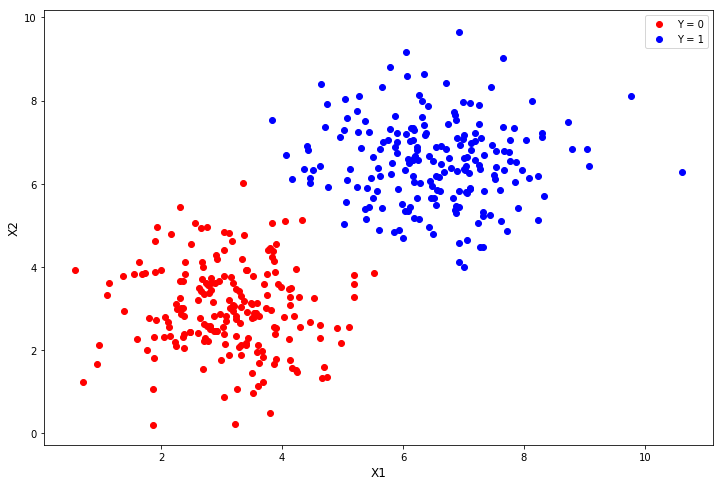

In [5]:
# generation of two set set of data correspondinf to two different categories (0 or 1)
x1 = np.random.RandomState(1).normal(loc=3.0, scale=1.0, size=(2, 200))
y1 = np.zeros((1,200))
x2 = np.random.RandomState(2).normal(loc=6.5, scale=1.0, size=(2, 200))
y2 = np.ones(shape=(1,200))
plt.figure(figsize=(12,8))
plt.scatter(x1[0,:], x1[1,:], color='red', label='Y = 0')
plt.scatter(x2[0,:], x2[1,:], color='blue', label='Y = 1')
plt.xlabel("X1", size=12)
plt.ylabel("X2", size=12)
plt.legend()
plt.show()

In [6]:
# put the two set togheter
X = np.hstack((x1, x2))
Y_target = np.hstack((y1, y2))
# randomly ordered
data = np.vstack((Y_target, X))
np.random.seed(123)
np.random.shuffle(data.T)
Y_target = data[0,:].reshape(1, len(data[0,:]))
X = data[1:, :]

Now that we have the data, we'll train a simple neural network and see the results.

In [7]:
# define the hyperparameters
layers = [2, 1]
activations = {"g1":"sigmoid"}
loss = "logistic"
lr = 0.05
num_iterations = 400

In [8]:
# create an object from the class NeuralNetworkGD
nnGD = NeuralNetworkGD(activations=activations, layers=layers, learning_rate=lr, loss=loss, random_state=0, binary_classifier=True)
# Execute the fitting of data by using the method fit
nnGD.fit(X=X, Y_target=Y_target, epochs=num_iterations)

Epochs = 5,  Cost = 1.0410201712447564
Epochs = 10,  Cost = 0.8709805190413382
Epochs = 15,  Cost = 0.8427932271715172
Epochs = 20,  Cost = 0.8183069447053858
Epochs = 25,  Cost = 0.7948539431671874
Epochs = 30,  Cost = 0.7724252546621845
Epochs = 35,  Cost = 0.7510268033974077
Epochs = 40,  Cost = 0.7306589163039098
Epochs = 45,  Cost = 0.7113159480065605
Epochs = 50,  Cost = 0.692986195401767
Epochs = 55,  Cost = 0.6756519811071638
Epochs = 60,  Cost = 0.6592899071002453
Epochs = 65,  Cost = 0.6438712709689358
Epochs = 70,  Cost = 0.6293626268281025
Epochs = 75,  Cost = 0.6157264638882718
Epochs = 80,  Cost = 0.6029219689817139
Epochs = 85,  Cost = 0.5909058357399684
Epochs = 90,  Cost = 0.5796330828122169
Epochs = 95,  Cost = 0.5690578462934457
Epochs = 100,  Cost = 0.5591341167881193
Epochs = 105,  Cost = 0.5498163984188617
Epochs = 110,  Cost = 0.5410602746733701
Epochs = 115,  Cost = 0.5328228734159715
Epochs = 120,  Cost = 0.5250632300078122
Epochs = 125,  Cost = 0.5177425528547

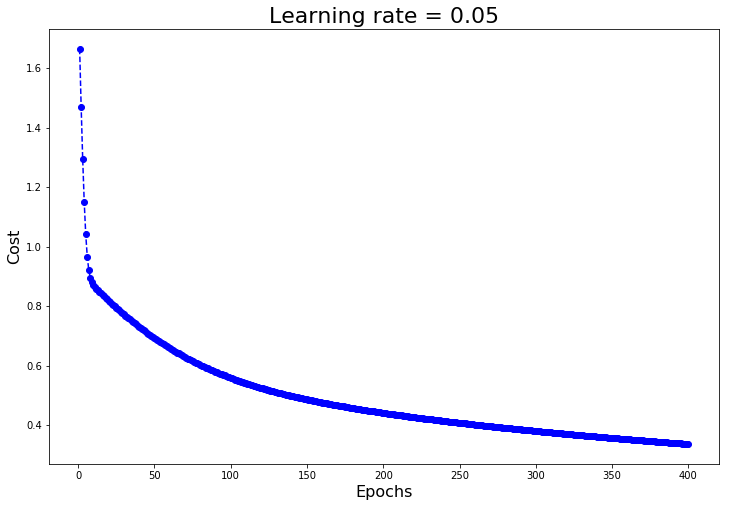

In [9]:
# plot the results
nnGD.plot_cost_function()

In [10]:
# show the parameters
nnGD.show_parameters()

W1 = [[0.27493229 0.33203916]]
b1 = [[-2.43832424]]


In [11]:
# definition of a function to plot the decision regions
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, Y, classifier, resolution=[400,400]):
    """
    Input:
    --------
    X : array of shape (2, n_samples)
    Y : array of shape (1, n_samples)
    classifier : instance object from NeuralNetworkGD class with loogistic function
    resolution : list
    
    Output:
    --------
    None
    """
    # setup markers and colors
    markers = ('o', 'x', '^', 'v', 's')
    colors = ('red', 'blue', 'green', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(Y))])
    
    # use meshgrid method
    X1_min, X1_max = X[0,:].min() - 1, X[0,:].max() + 1
    X2_min, X2_max = X[1,:].min() - 1, X[1,:].max() + 1
    X1, X2 = np.linspace(X1_min, X1_max, resolution[0]), np.linspace(X2_min, X2_max, resolution[1])
    XX1, XX2 = np.meshgrid(X1, X2)
    Z = classifier.predict(np.array([XX1.ravel(), XX2.ravel()]))
    Z = Z.reshape(XX1.shape)
    
    # plot the regions
    plt.figure(figsize=(12,8))
    plt.contourf(XX1, XX2, Z, alpha=0.5, cmap=cmap)
    plt.xlim(X1_min, X1_max)
    plt.ylim(X2_min, X2_max)
    
    # plot the data
    for idx, cl in enumerate(np.unique(Y)):
        list_idx = (Y[0,:] == cl)
        plt.scatter(X[0,list_idx], X[1, list_idx], marker=markers[idx], label="Y = {:d}".format(int(cl)), alpha=0.9, c=colors[idx], edgecolors='black')
    plt.xlabel("X1", size=12)
    plt.ylabel("X2", size=12)
    plt.legend()

In [12]:
# definition of a function to compute the accuracy
def compute_accuracy(X, Y, classifier):
    """
    Input:
    --------
    X : array of shape (2, n_samples)
    Y : array of shape (1, n_samples)
    classifier : instance object from NeuralNetworkGD class with loogistic function
    
    Output:
    --------
    accuracy : float
    """
    Y_pred = classifier.predict(X)
    accuracy = np.mean(Y_pred == Y)
    return accuracy

Accuracy = 0.95


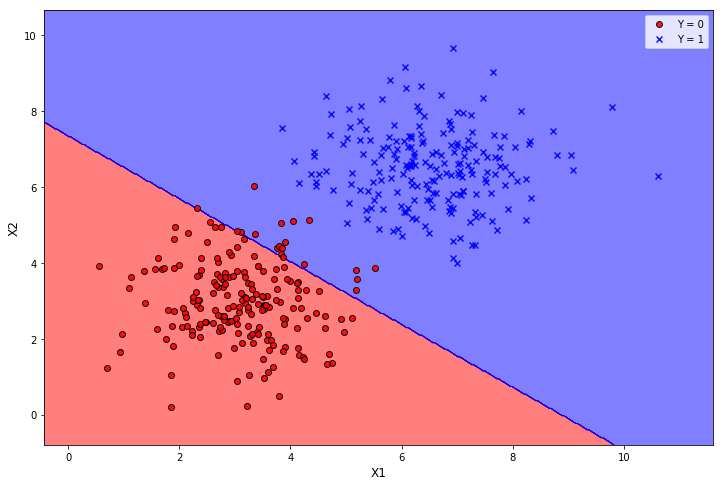

In [13]:
plot_decision_regions(X=X, Y=Y_target, classifier=nnGD)
print("Accuracy = {:.2f}".format(compute_accuracy(X=X, Y=Y_target, classifier=nnGD)))

Like we can see, our code seems to work: with a learning rate equal to $0.05$, we have got an accuracy of $0.95$, but the number of epochs (in this case it's equal to the number of iterations) to achieve such good result requires an high value of $epochs \sim 400$, not really efficient in a case of a lot of data.

In the next step we'll implement other classes related to the main $optimization\mbox{ }algorithms$.

## Implementation of a Neural Network with Stochastic Gradient Descent Algorithm

The "$Stochastic\mbox{ }Gradient\mbox{ }Descent\mbox{ }Algorithm$"  (SGD) is one of the gradient-based optimization algorithms most used in Machine Learning, specially in Deep learning.

In the GD algorithm, we execute parameters updates by using the entire training set, which is called "$batch$". 
While in SGD, for each iteration, we use a randomly chosen subset of training data of fixed size, called $stochastic\mbox{ }mini-batch$.
Optimization algorithms which use only one example at a time are called $stochastic$ and some times $online$ methods. 

A crucial parameter in SGD is the learning rate. In GD we use a fixed learning rate. In practice it's necessary to decrease the learning rate over time. This because SGD introduces a source of noise (the random chosing of $m$ example training) that does not vanish when we arrive at the minimum of cost function. In practise the effective learning rate at $k-th$ iteration will be

$$
\eta_k = (1 - \alpha) \eta_0 + \alpha \eta_\tau
$$

where $\alpha = \dfrac{k}{\tau}$, $\eta_0$ is the initial value of the learning rate and $\tau$ is the iteration after that the learning rate will be constant. So we'll have three hyperparameters: 

$$
\eta_0, \tau, \eta_\tau
$$

Typically $\tau$ is set to a number of iterations to execute a few hundred passes through the training set, while $\eta_\tau$ is usually set to 1 percent of $\eta_0$. Finally the initial learning rate $\eta_0$ it's to be chosen carefully, neither too low nor too large to avoid a slow learning or violent oscillations.
The main property of the SGD and the related mini-batch or online gradient-based optimization is that the computation time to update  parameters doesn't dipend by the number of training samples, allowing convergence when the number of training samples becomes very large.

In following will indicate with $k$ not the index of iterations but the index of epoch.

SGD Algorithm:

1) Initial value of learning rate $\eta$

2) initialize parameter $\theta$ and velocity $V_\theta$

3) For each epoch $k$:

3.1) given an input data $X$ of shape $(n_0, n)$, randomly extract mini-batches, each one of m samples of shape $(n_0, m)$ and the 
corresponding targets $(y^{(1)}, ..., y^{(m)})$ of shape $(n_L, m)$
   
3.2) for each mini-batch
     
   3.2.1) compute the output $A_L$ of shape $(n_L, m)$ by the $forward\mbox{ }propagation$
        
   3.2.2) compute the cost function: $\quad J(\theta) = \dfrac{1}{m}\sum_{k=1}^m\zeta\left(\theta, y^{(k)}, A_L^{(k)}\right)$
        
   3.2.3) compute the gradients of the cost function respect to the parameters: $\quad\bigtriangledown_{\theta} J(\theta)$
        
   3.2.4) update the parameters $\theta$ (weights and biases): $\quad\theta \Rightarrow \theta - \eta\bigtriangledown_{\theta} J(\theta)$
        
3.3) compute the mean of cost function on values got from mini-batches
   
3.4) update the learning rate: $\quad\eta_k = (1 - \alpha) \eta_0 + \alpha \eta_\tau$

In [14]:
class NeuralNetworkSGD(NeuralNetworkGD):
    """
    
    Implementation of a General Neural Network based on Stochastic Gradient Descent Algorithm. 
    In case of classification, it can be used only for binary classification.
    
    Parameters:
    -----------
    Weights
        matrix of shape (n_l, n_l-1) for l-th layer
    Biases
        matrix of shape (n_l, 1) for l-th layer
    
    Hyperparameters:
    ----------------
    Learning rate:
        real number between 0 and 1 included in updating of parameters
    Number of layers:
        int number 
    Number of neurons for each layer:
        int number
    Activation function for each layer
    mini-batch size:
        int number
        
    
    Attributes:
    -----------
    _layers : list
        Number of neurons for each layer. The first layer refers to the input data
    _activations: dictionary
        Name of activation function for each layer
    _loss: string
        Loss function
    _learning_rate : float 
        Learning rate (between 0.0 and 1.0)
    _random_state : int which is used 
        Random number generator seed for random weights initialization for each layer. It's used to have a
        reproducible and changable initialization.
    _weights : dictionary
        Matrix weights for each layer (shape = (n_l-1, n_l)). Each matrix is identified by a key like Wl
    _biases : dictionary
        Matrix biases for each layer (shape = (n_l, 1)). Each matrix is identified by a key like bl
    epochs : int
        Number of epochs (In this case it's equal to the number of iterations)
    cost_values : list
        Sum-of-loss function value averaged over all training samples in each epoch
    binary_classifier : boolean 
    classes : 1d-array 
        Values for two categories
    mini_batch_size : int
   
    """
    # Constructor
    def __init__(self, layers, activations, loss, learning_rate=0.001, random_state=0, binary_classifier=False, mini_batch_size=16):
        """Constructor
        Input:
        ------
        layers : list
        activations : dictionary
        loss : string
        learning_rate : float (default: 0.001)
        random_state : int (default: 0)
        binary_classifier : boolean (default: False)
        mini_batch_size : int (default: 16)
        
        Output:
        -------
        None
        """
        super().__init__(layers, activations, loss, learning_rate, random_state, binary_classifier)
        self.mini_batch_size = mini_batch_size
        
    def _get_list_mini_batches(self, X_training, Y_target):
        """
        Input:
        --------
        X_training : array of shape (n_features, n_samples)
        Y_training : array of shape (n_L, n_samples)
        
        Output:
        ---------
        list_X_mini_batches : list of arrays,  
            each one of shape (n_features, mini_batch_size) except the last one if n_samples % mini_batch_size is different from zero
        list_Y_mini_batches : list of arrays
            each one of shape (n_L, mini_batch_size) except the last one if n_samples % mini_batch_size is different from zero
        """
        # concatenate X_training and Y_target
        data_Y_X = np.concatenate((Y_target, X_training), axis=0)
        # random order in data_Y_X
        np.random.shuffle(data_Y_X.T)
        # initialize lists of mini-batches
        list_X_mini_batches = []
        list_Y_mini_batches = []
        # for each mini-batch-X and mini-batch-Y
        n_samples = X_training.shape[1]
        for i in range(0, n_samples, self.mini_batch_size):
            Y_mini_batch = data_Y_X[:Y_target.shape[0], i:i+self.mini_batch_size]
            X_mini_batch = data_Y_X[Y_target.shape[0]:, i:i+self.mini_batch_size]
            # append them to the two lists
            list_X_mini_batches.append(X_mini_batch)
            list_Y_mini_batches.append(Y_mini_batch)
        # return the two lists
        return list_X_mini_batches, list_Y_mini_batches 

    def _update_learning_rate(self, idx_epoch):
        """
        Input:
        --------
        idx_epoch : int 
            index of epoch
        
        Output:
        ---------
        lr_new : float 
            learning rate updated
        """
        alpha = idx_epoch/self.epochs
        eta_tau = self._learning_rate/100
        lr_new = (1-alpha)*self._learning_rate + alpha*eta_tau
        
        #lr_new = (1 - alpha*0.90)*self._learning_rate
        return lr_new
    
    def _update_parameters(self, caches, X, Y, lr_new):
        """
        Inputs:
        --------
        caches : a list of tuples 
            a tuple for each layer containing (Z_l, A_l)
        X: 2d-array of shape (n_features, n_samples)
        Y : 2d-array of shape (n_L, n_samples)
            expected targets 
        lr_new : float 
            learning rate updated
        
        Outputs:
        ---------
        None
        """
        # get the dictionaries of gradients dW and db
        dW, db = super()._backward_propagation(caches, X, Y)
        # for each layer
        for l in range(1, len(self._layers)):
            # update the weigths and biases
            self._weights["W" + str(l)] += -lr_new*dW[str(l)]
            self._biases["b" + str(l)] += -lr_new*db[str(l)]
        
    
    def fit(self, X, Y_target, epochs):
        """
        Input:
        X : 2d-array of shape (n_features, n_samples)
        Y_target : 2d-array of shape (n_L, n_samples)
            Expected outputs
        epochs : int 
            Number of epochs
        
        Outputs:
        self : the same object 
        """
        # Initialize parameters
        super().initialize_parameters()
        # initialize attribute epochs
        self.epochs = epochs
        # initialize a list of errors
        self.cost_values = []
        
        # if this neural network is for binary classification
        if self.binary_classifier == True:
            # extract the targets values for two categories
            self.classes = np.unique(Y_target)
        
        # initial value for the learning rate
        lr_new = self._learning_rate
        # for each epoch
        for k in range(1,self.epochs+1):
            # get the lists of mini-batches
            list_X_mini_batch, list_Y_mini_batch = self._get_list_mini_batches(X, Y_target)
            # for each mini-batch
            cost = 0.
            for X_mini_batch, Y_mini_batch in zip(list_X_mini_batch, list_Y_mini_batch):
                # apply the forward-propagation
                caches, Y_pred = super()._forward_propagation(X_mini_batch)
                # compute the cost function
                cost += super()._cost_function(Y_mini_batch, Y_pred)
                # apply the backward-propagation and update the weights and biases in the neural network
                self._update_parameters(caches, X_mini_batch, Y_mini_batch, lr_new)
                
            # compute mean of cost and append it into the list cost_values
            cost = cost/len(list_X_mini_batch)
            self.cost_values.append(cost)
            # show the cost function value
            if (k%5 == 0):
                print("Epochs = {},  Cost = {}".format(k, cost))
            # update learning rate
            lr_new = self._update_learning_rate(k)
        # return the same object
        return self
    
    def plot_cost_function(self):
        """Method to plot cost function after the training of neural network"""
        plt.figure(figsize=(12,8))
        plt.plot(np.arange(1, self.epochs+1), self.cost_values, 'bo--')
        plt.title("Initial Learning rate = {}, mini-bacth-size = {}".format(self._learning_rate,
                                                                                  self.mini_batch_size), size=18)
        plt.xlabel("Epochs", size=16)
        plt.ylabel("Cost", size=16)
        plt.show()
    

In [15]:
# training a NNSGD on same data of before
nnSGD = NeuralNetworkSGD(layers, activations, loss, learning_rate=0.05, random_state=0, binary_classifier=True, mini_batch_size=1)
nnSGD.fit(X=X, Y_target=Y_target, epochs=20)

Epochs = 5,  Cost = 0.15063708272579712
Epochs = 10,  Cost = 0.0991033012808789
Epochs = 15,  Cost = 0.08268294158715662
Epochs = 20,  Cost = 0.0761739552155752


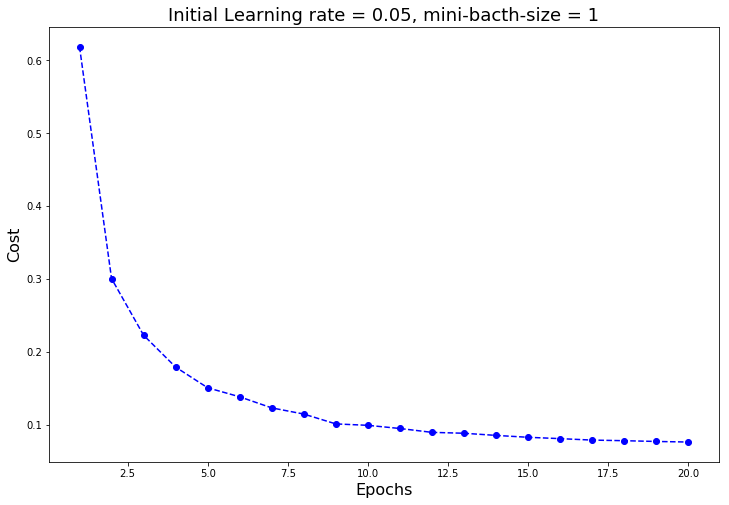

In [16]:
nnSGD.plot_cost_function()

In [17]:
# show the parameters
nnSGD.show_parameters()

W1 = [[0.94885302 0.93294228]]
b1 = [[-8.80733636]]


0.995

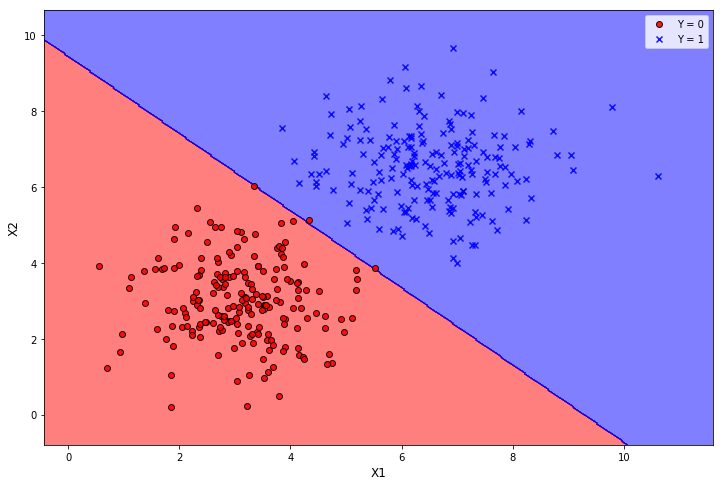

In [18]:
# plot the decision regions
plot_decision_regions(X=X, Y=Y_target, classifier=nnSGD)
compute_accuracy(X=X, Y=Y_target, classifier=nnSGD)

How we can see we have obtained values of parameters close to the minimun of the cost function corresponding at an accuracy of $0.99$ with mini-batch-size = $1$, learning rate = $0.05$ and with only $\sim 20$ epochs.

## Neural Network with SGD and Momentum algorithms

The method of $Momentum$ is designed to accelerate learning. It accumulates an exponentially decaying moving average of pasts gradients and continue in moving in the same direction. In practice with the method of momentum we'll introduce a new variable $\textbf{V}$ that plays the role of velocity (direction and speed in the space of parameters). It is set to the exponentially decaying average of the negative gradient as follows:

$$
V_\theta \Rightarrow \alpha V_\theta - \eta\bigtriangledown_\theta J
$$

where $\alpha \in [0,1)$ is a new hyperparameter which determines how quickly the contribution of the previous gradients decays. The parameters will be updated as follows:

$$
\theta \Rightarrow \theta + V_\theta
$$

Stochastic Gradient Descent (SGD) algorithm with momentum:

1) Define learning rate $\eta$ and $\alpha$

2) initialize parameter $\theta$ and velocity $V_\theta$

3) for each epoch $k$:

3.1) from the input data $X$ of shape $(n_0, n)$, randomly extract mini-batches, each one of m samples of shape $(n_0, m)$ and the 
    corresponding targets $(y^{(1)}, ..., y^{(m)})$ of shape $(n_L, n)$
   
3.2) for each mini-batch
     
3.2.1) compute the output $A_L$ of shape $(n_L, m)$ by the $forward\mbox{ }propagation$
        
3.2.2) compute the cost function: $\quad J(\theta) = \dfrac{1}{m}\sum_{k=1}^m\zeta\left(\theta, y^{(k)}, A_L^{(k)}\right)$
        
3.2.3) compute the gradients: $\quad\bigtriangledown_{\theta} J(\theta)$ 

3.2.4) update velocity:  $V_\theta \Rightarrow \alpha V_\theta -\eta\bigtriangledown_\theta J(\theta)$

3.2.5) update the parameters (weights and biases):  $\theta \Rightarrow \theta + V_\theta$
        
3.3) compute the mean of cost function on values got from mini-batches

3.4) update learning rate $\eta_k$

In [19]:
class NeuralNetworkSGDMom(NeuralNetworkSGD):
    """
    
    Implementation of a General Neural Network based on Stochastic Gradient Descent Algorithm with momentum. 
    In case of classification, it can be used only for binary classification.
    
    Parameters:
    -----------
    Weights
        matrix of shape (n_l, n_l-1) for l-th layer
    Velocity
        dictionaries of velocity related to the gradients
    Biases
        matrix of shape (n_l, 1) for l-th layer
    
    Hyperparameters:
    ----------------
    Learning rate:
        real number between 0 and 1 included in updating of parameters
    Alpha : 
        real number between 0 and 1 included in updating of velocity
    Number of layers:
        int number 
    Number of neurons for each layer:
        int number
    Activation function for each layer
    mini-batch size:
        int number
    
    Attributes:
    -----------
    _layers : list
        Number of neurons for each layer. The first layer refers to the input data
    _activations: dictionary
        Name of activation function for each layer
    _loss: string
        Loss function
    _learning_rate : float 
        Learning rate (between 0.0 and 1.0)
    _random_state : int which is used 
        Random number generator seed for random weights initialization for each layer. It's used to have a
        reproducible and changable initialization.
    _weights : dictionary
        Matrix weights for each layer (shape = (n_l-1, n_l)). Each matrix is identified by a key like Wl
    _biases : dictionary
        Matrix biases for each layer (shape = (n_l, 1)). Each matrix is identified by a key like bl
    epochs : int
        Number of epochs (In this case it's equal to the number of iterations)
    cost_values : list
        Sum-of-loss function value averaged over all training samples in each epoch
    binary_classifier : boolean 
    classes : 1d-array 
        Values for two categories
    mini_batch_size : int
    _v_dW : dictionary
        velocity related to weights
    _v_db : dictionary
        velocity related to biases
   
    """
    # Constructor
    def __init__(self, layers, activations, loss, learning_rate=0.001, random_state=0, binary_classifier=False, mini_batch_size=16, alpha=0.9):
        """Constructor
        Input:
        ------
        layers : list
        activations : dictionary
        loss : string
        learning_rate : float (default: 0.001)
        random_state : int (default: 0)
        binary_classifier : boolean (default: False)
        mini_batch_size : int (default: 16)
        alpha : float [0, 1) (default: 0.9)
        
        Output:
        -------
        None
        """
        super().__init__(layers, activations, loss, learning_rate, random_state, binary_classifier, mini_batch_size)
        self.alpha = alpha
    
    def _initialize_velocity_gradients(self):
        """Method to initialize the dictionaries of velocities v_dW and v_db"""
        # Initialize two dictionary for the velocity(exponential decay average of gradients)
        self._v_dW = {}
        self._v_db = {}
        # for each layer
        for l in range(1,len(self._layers)):
            # get the shape of the l-layer and l-1 layer
            n_l = self._layers[l]
            n_l_prev = self._layers[l-1]
            #initialize the velocities related to gradient for weigths and biases
            self._v_dW["v_dW" + str(l)] = np.zeros((n_l,n_l_prev))
            self._v_db["v_db" + str(l)] = np.zeros((n_l,1))

    
    def _update_parameters(self, caches, X, Y, lr_new):
        """
        Inputs:
        --------
        caches : a list of tuples, a tuple for each layer containing (Z_l, A_l)
        X: 2d-array of shape (n_features, n_samples)
        Y : 2d-array of shape (n_L, n_samples)
            expected outputs
        lr_new : float 
            learning rate updated
        
        Outputs:
        ---------
        None
        """
        # compute the dictionaries of gradients dW and db
        dW, db = NeuralNetworkGD._backward_propagation(self, caches, X, Y)
        # for each layer
        for l in range(1, len(self._layers)):
            # update the velocity
            self._v_dW["v_dW" + str(l)] = self.alpha*self._v_dW["v_dW" + str(l)] -lr_new*dW[str(l)]#+ (1. - self.alpha)*(-lr_new*dW[str(l)])
            self._v_db["v_db" + str(l)] = self.alpha*self._v_db["v_db" + str(l)] -lr_new*db[str(l)]#+ (1. - self.alpha)*(-lr_new*db[str(l)])
            # update the weigths and biases
            self._weights["W" + str(l)] += self._v_dW["v_dW" + str(l)]
            self._biases["b" + str(l)] += self._v_db["v_db" + str(l)]
        
    
    def fit(self, X, Y_target, epochs):
        """
        Input:
        ------
        X :  2d-array of shape (n_features, n_samples)
        Y_target : 2d-array of shape (n_L, n_samples)
        epochs : int
            number of epochs
        
        Output:
        -------
        self : the same object 
        """
        # Initialize parameters
        NeuralNetworkGD.initialize_parameters(self)
        # initialize attribute epochs
        self.epochs = epochs
        # initialize a list of errors
        self.cost_values = []
        # initial value for the learning rate
        lr_new = self._learning_rate
        
        # if this neural network is for binary classification
        if self.binary_classifier == True:
            # extract the targets values for two categories
            self.classes = np.unique(Y_target)
        
        # initialize the velocity 
        self._initialize_velocity_gradients()
        
        
        # for each epoch
        for k in range(1,self.epochs+1):
            # get the lists of mini-batches
            list_X_mini_batch, list_Y_mini_batch = super()._get_list_mini_batches(X, Y_target)
            # for each mini-batch
            cost = 0.
            for X_mini_batch, Y_mini_batch in zip(list_X_mini_batch, list_Y_mini_batch):
                # apply the forward-propagation
                caches, Y_pred = NeuralNetworkGD._forward_propagation(self, X_mini_batch)
                # compute the loss function
                cost += NeuralNetworkGD._cost_function(self, Y_mini_batch, Y_pred)
                # apply the backward-propagation and update the weights and biases by using the momentum algorithm
                self._update_parameters(caches, X_mini_batch, Y_mini_batch, lr_new)
                
            # compute mean of cost and appends it into the list costs_values
            cost = cost/len(list_X_mini_batch)
            self.cost_values.append(cost)
            # show the cost function value
            if (k%5 == 0):
                print("Epochs = {},  Cost = {}".format(k, cost))
            # update learning rate
            lr_new = super()._update_learning_rate(k)
        # return the same object
        return self
    
    def plot_cost_function(self):
        """Method to plot cost function after the training of neural network"""
        plt.figure(figsize=(12,8))
        plt.plot(np.arange(1, self.epochs+1), self.cost_values, 'bo--')
        plt.title(r"Initial Learning rate = {}, mini-bacth-size = {}, $\alpha$ = {}".format(self._learning_rate,
                                                                                  self.mini_batch_size, self.alpha), size=16)
        plt.xlabel("Epochs", size=16)
        plt.ylabel("Cost", size=16)
        plt.show()
    

In [20]:
nnSGDMom = NeuralNetworkSGDMom(layers, activations, loss, learning_rate=0.05, random_state=0, binary_classifier=True, mini_batch_size=1, alpha=0.9)
nnSGDMom.fit(X=X, Y_target=Y_target, epochs=10)

Epochs = 5,  Cost = 0.06775910795670206
Epochs = 10,  Cost = 0.012764021820400146


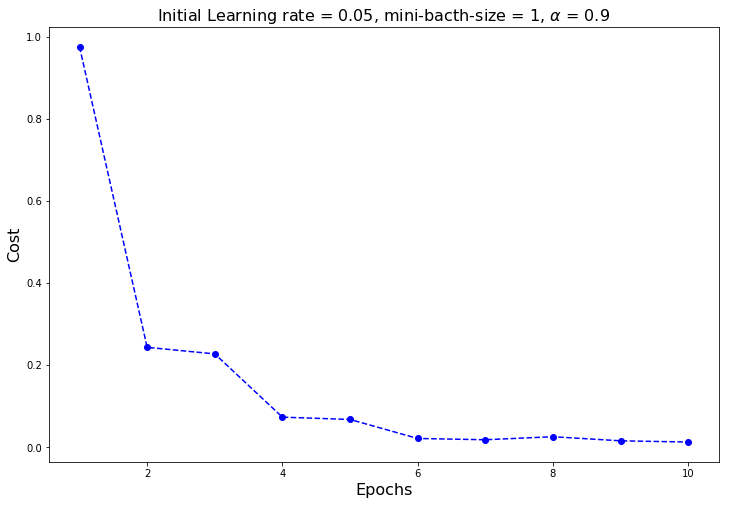

In [21]:
nnSGDMom.plot_cost_function()

Accuracy = 1.00


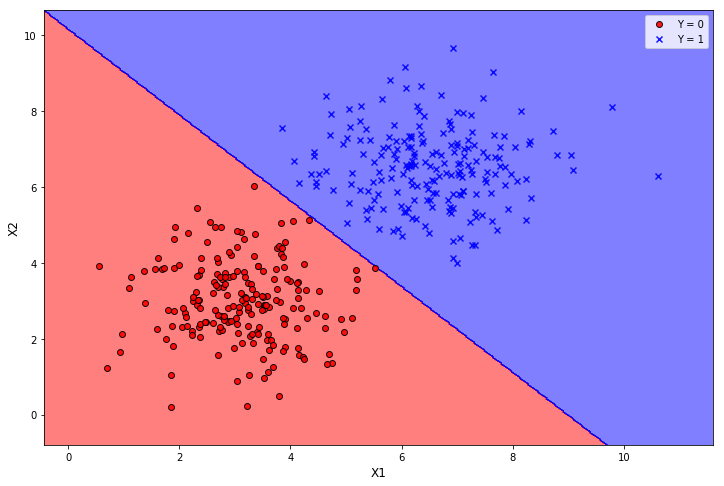

In [22]:
# plot the decision regions
plot_decision_regions(X=X, Y=Y_target, classifier=nnSGDMom)
# compute the accuracy
print("Accuracy = {:.2f}".format(compute_accuracy(X=X, Y=Y_target, classifier=nnSGDMom)))

In [23]:
nnSGDMom.show_parameters()

W1 = [[2.70980403 2.3962734 ]]
b1 = [[-24.33946102]]


From the results we see that with online method (mini-batch-size = $1$), learning rate = $0.05$ and $\alpha = 0.9$ we've an accuracy $1.0$
with only $10$ epochs, it's a very efficient algorithm.

## Neural network with SGD and Nesterov Momentum

The $Nesterov\mbox{ }momentum$ consists of a correction of the standard momentum model, the difference is where the gradient is evaluated. In Nesterov momentum the gradient is evaluated after the current velocity is applied. In practice in the parameters update we'll have:

$$
V_\theta \Rightarrow \alpha V_\theta -\eta\bigtriangledown_\theta J(\theta + \alpha V_\theta) \\
\theta \Rightarrow \theta + V_\theta
$$

So applying this modification in the previous algorithm, the SGD algorithm with Nesterov momentum we'll be:

Stochastic Gradient Descent (SGD) with Nesterov momentum

1) Define learning rate $\eta$ and $\alpha$

2) initialize parameter $\theta$ and velocity $V_\theta$

3) for each epoch $k$:

3.1) from the input data $X$ of shape $(n_0, n)$, randomly extract mini-batches, each one of m samples of shape $(n_0, m)$ and the 
    corresponding targets $(y^{(1)}, ..., y^{(m)})$ of shape $(n_L, n)$
   
3.2) for each mini-batch

3.2.1) apply interim update of parameters: $\quad \theta \Rightarrow \theta + \alpha V_\theta = \bar{\theta}$
     
3.2.2) compute the output $A_L$ of shape $(n_L, m)$ by the $forward\mbox{ }propagation$
        
3.2.3) compute the cost function: $\quad J\left(\bar{\theta}\right) = \dfrac{1}{m}\sum_{k=1}^m\zeta\left(\bar{\theta}, y^{(k)}, A_L^{(k)}\right)$
        
3.2.4) compute the gradients: $\quad\bigtriangledown_{\bar{\theta}} J\left(\bar{\theta}\right)$ 

3.2.5) update velocity:  $V_\theta \Rightarrow \alpha V_\theta -\eta\bigtriangledown_\bar{\theta} J\left(\bar{\theta}\right)$

3.2.6) update the parameters (weights and biases):  $\theta \Rightarrow \theta + V_\theta$
        
3.3) compute the mean of cost function on values obtained from mini-batches

3.4) update learning rate $\eta_k$

In [24]:
class NeuralNetworkSGDNestMom(NeuralNetworkSGDMom):
    """
    
    Implementation of a General Neural Network based on Stochastic Gradient Descent Algorithm with Nesterov momentum. 
    In case of classification, it can be used only for binary classification.
    
    Parameters:
    -----------
    Weights
        matrix of shape (n_l, n_l-1) for l-th layer
    Velocity
        dictionaries of velocity related to the gradients
    Biases
        matrix of shape (n_l, 1) for l-th layer
    
    Hyperparameters:
    ----------------
    Learning rate:
        real number between 0 and 1 included in updating of parameters
    Alpha : 
        real number between 0 and 1 included in updating of velocity
    Number of layers:
        int number 
    Number of neurons for each layer:
        int number
    Activation function for each layer
    mini-batch size:
        int number
    
    Attributes:
    -----------
    _layers : list
        Number of neurons for each layer. The first layer refers to the input data
    _activations: dictionary
        Name of activation function for each layer
    _loss: string
        Loss function
    _learning_rate : float 
        Learning rate (between 0.0 and 1.0)
    _random_state : int which is used 
        Random number generator seed for random weights initialization for each layer. It's used to have a
        reproducible and changable initialization.
    _weights : dictionary
        Matrix weights for each layer (shape = (n_l-1, n_l)). Each matrix is identified by a key like Wl
    _biases : dictionary
        Matrix biases for each layer (shape = (n_l, 1)). Each matrix is identified by a key like bl
    epochs : int
        Number of epochs (In this case it's equal to the number of iterations)
    cost_values : list
        Sum-of-loss function value averaged over all training samples in each epoch
    binary_classifier : boolean 
    classes : 1d-array 
        Values for two categories
    mini_batch_size : int
    _v_dW : dictionary
        velocity related to weights
    _v_db : dictionary
        velocity related to biases
   
    """
    # Constructor
    def __init__(self, layers, activations, loss, learning_rate=0.001, random_state=0, binary_classifier=False, mini_batch_size=16, alpha=0.9):
        """Constructor
        Input:
        ------
        layers : list
        activations : dictionary
        loss : string
        learning_rate : float (default: 0.001)
        random_state : int (default: 0)
        binary_classifier : boolean (default: False)
        mini_batch_size : int (default: 16)
        alpha : float [0, 1) (default: 0.9)
        
        Output:
        -------
        None
        """
        super().__init__(layers, activations, loss, learning_rate, random_state, binary_classifier, mini_batch_size, alpha)
        
    
    def _interim_update_parameters(self):
        """Method to correct the parameters with velocities before forward propagation as required in Nesterov Momentum"""
        # for each layer
        for l in range(1, len(self._layers)):
            # apply interim update of parameters
            self._weights["W" + str(l)] += self.alpha*self._v_dW["v_dW" + str(l)] 
            self._biases["b" + str(l)] += self.alpha*self._v_db["v_db" + str(l)] 

    
    def _update_parameters(self, caches, X, Y, lr_new):
        """
        Input:
        --------
        caches : a list of tuples, a tuple for each layer containing (Z_l, A_l)
        X: 2d-array of shape (n_features, n_samples)
        Y : 2d-array of shape (n_L, n_samples)
        lr_new : float 
            learning rate updated
        alpha : float in range [0,1] related to the momentum algorithm
        
        Output:
        ---------
        None
        """
        # compute the dictionaries of gradients dW and db
        dW, db = NeuralNetworkGD._backward_propagation(self, caches, X, Y)
        # for each layer
        for l in range(1, len(self._layers)):
            # get the previous values of parameters
            self._weights["W" + str(l)] -= self.alpha*self._v_dW["v_dW" + str(l)] 
            self._biases["b" + str(l)] -= self.alpha*self._v_db["v_db" + str(l)] 
            # update the velocity
            self._v_dW["v_dW" + str(l)] = self.alpha*self._v_dW["v_dW" + str(l)] + (-lr_new*dW[str(l)])
            self._v_db["v_db" + str(l)] = self.alpha*self._v_db["v_db" + str(l)] + (-lr_new*db[str(l)])
            # update the weigths and biases
            self._weights["W" + str(l)] += self._v_dW["v_dW" + str(l)]
            self._biases["b" + str(l)] += self._v_db["v_db" + str(l)]
        
    
    def fit(self, X, Y_target, epochs):
        """
        Input:
        ------
        X :  2d-array of shape (n_features, n_samples)
        Y_target : 2d-array of shape (n_L, n_samples)
        epochs : int
            Number of epochs
        
        Output:
        -------
        self : the same object 
        """
        # Initialize parameters
        NeuralNetworkGD.initialize_parameters(self)
        # initialize attribute epochs
        self.epochs = epochs
        # initialize a list of errors
        self.cost_values = []
        # initial value for the learning rate
        lr_new = self._learning_rate
        
        # if this neural network is for binary classification
        if self.binary_classifier == True:
            # extract the targets values for two categories
            self.classes = np.unique(Y_target)
    
        # initialize the velocity 
        super()._initialize_velocity_gradients()
        
        
        # for each epoch
        for k in range(1,self.epochs+1):
            # get the lists of mini-batches
            list_X_mini_batch, list_Y_mini_batch = super()._get_list_mini_batches(X, Y_target)
            # for each mini-batch
            cost = 0.
            for X_mini_batch, Y_mini_batch in zip(list_X_mini_batch, list_Y_mini_batch):
                # precorrect the parameters
                self._interim_update_parameters()
                # apply the forward-propagation
                caches, Y_pred = NeuralNetworkGD._forward_propagation(self, X_mini_batch)
                # compute the loss function
                cost += NeuralNetworkGD._cost_function(self, Y_mini_batch, Y_pred)
                # apply the backward-propagation and update the weights and biases by using the momentum algorithm
                self._update_parameters(caches, X_mini_batch, Y_mini_batch, lr_new)
                
            # compute mean of cost and appends it into the list costs_values
            cost = cost/len(list_X_mini_batch)
            self.cost_values.append(cost)
            # show the cost function value
            if (k%5 == 0):
                print("Epochs = {},  Cost = {}".format(k, cost))
            # update learning rate
            lr_new = NeuralNetworkSGD._update_learning_rate(self,k)
        # return the same object
        return self
    

In [25]:
nnSGDNestMom = NeuralNetworkSGDNestMom(layers, activations, loss, learning_rate=0.05, random_state=0, binary_classifier=True, mini_batch_size=1, alpha=0.9)

In [26]:
nnSGDNestMom.fit(X=X, Y_target=Y_target, epochs=10)

Epochs = 5,  Cost = 0.059287119610247185
Epochs = 10,  Cost = 0.020370799389296413


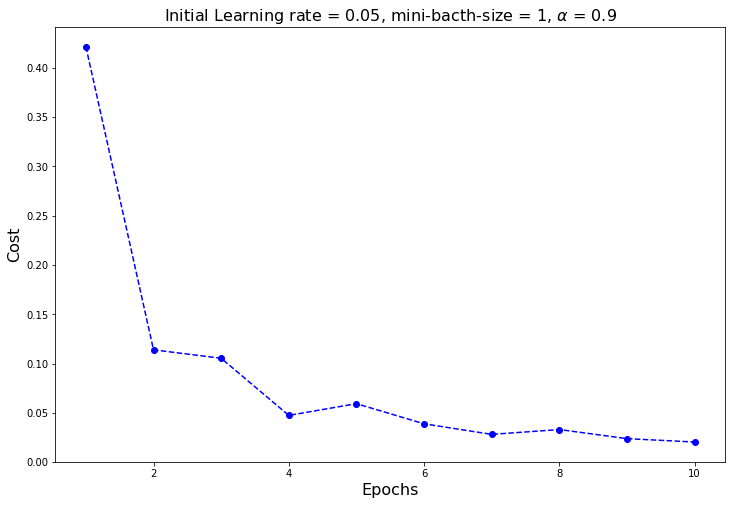

In [27]:
nnSGDNestMom.plot_cost_function()

Accuracy = 0.99


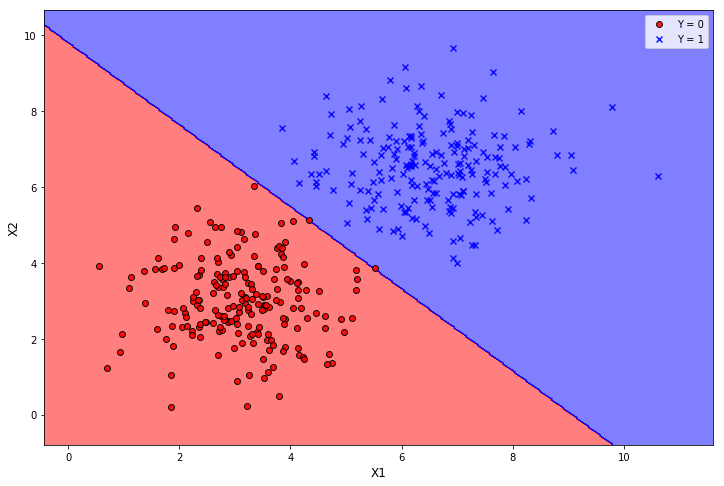

In [28]:
# plot decision regions
plot_decision_regions(X=X, Y=Y_target, classifier=nnSGDNestMom)
# compute accuracy and print it
print("Accuracy = {:.2f}".format(compute_accuracy(X=X, Y=Y_target, classifier=nnSGDNestMom)))

In [29]:
nnSGDNestMom.show_parameters()

W1 = [[2.08982396 1.93258239]]
b1 = [[-18.94230956]]


How we can see in our case of binary classification, with same values of hyperparameters, it seems there isn't a big difference between SGD with momentum and SGD with Nesterov momentum.

## Algorithms with adaptive learning rate

In this subsection we'll implement a neural network with the main adaptive learning rate algorithms, in which the learning rate is not constant but it changes too, like showed in the Stochastic Gradiente Descent before.

### 1) AdaGrad
The AdaGrad algorithm adapts the learning rate by scaling it inversely proportional to the square root of the sum of all the historical squared values of the gradient. In practice the Adagrad algorithm is showed below:

1) Define the global learning rate $\eta$

2) initialize parameters $\theta$

3) Small constant $\delta$, usually $10^{-7}$, for numerical stability

4) for each epoch:

4.1) from the input data $X$ of shape $(n_0, n)$, randomly extract mini-batches, each one of m samples of shape $(n_0, m)$ and the 
    corresponding targets $(y^{(1)}, ..., y^{(m)})$ of shape $(n_L, n)$
   
4.2) for each mini-batch
     
4.2.1) compute the output $A_L$ of shape $(n_L, m)$ by the $forward\mbox{ }propagation$
        
4.2.2) compute the cost function: $\quad J\left(\theta\right) = \dfrac{1}{m}\sum_{k=1}^m\zeta\left(\theta, y^{(k)}, A_L^{(k)}\right)$
        
4.2.3) compute the gradients: $\quad g = \bigtriangledown_{\theta} J\left(\theta\right)$ 

4.2.4) accumulate squared gradients:  $\quad r \Rightarrow r + g\odot g$

4.2.5) update the parameters (weights and biases):  $\quad \theta \Rightarrow \theta - \dfrac{\eta}{\delta + \sqrt{r}} g $
        
With this algorithm we'll have an effective learning rate that will depend on the parameters, in particular by the corresponding gradient.

In [30]:
class NeuralNetworkAdaGrad(NeuralNetworkSGD):
    """
    
    Implementation of a General Neural Network based on AdaGrad Algorithm 
    In case of classification, it can be used only for binary classification.
    
    Parameters:
    -----------
    Weights
        matrix of shape (n_l, n_l-1) for l-th layer
    Biases
        matrix of shape (n_l, 1) for l-th layer
    
    Hyperparameters:
    ----------------
    Learning rate:
        real number between 0 and 1 included in updating of parameters
    Number of layers:
        int number 
    Number of neurons for each layer:
        int number
    Activation function for each layer
    mini-batch size:
        int number
        
    
    Attributes:
    -----------
    _layers : list
        Number of neurons for each layer. The first layer refers to the input data
    _activations: dictionary
        Name of activation function for each layer
    _loss: string
        Loss function
    _learning_rate : float 
        Learning rate (between 0.0 and 1.0)
    _random_state : int which is used 
        Random number generator seed for random weights initialization for each layer. It's used to have a
        reproducible and changable initialization.
    _weights : dictionary
        Matrix weights for each layer (shape = (n_l-1, n_l)). Each matrix is identified by a key like Wl
    _biases : dictionary
        Matrix biases for each layer (shape = (n_l, 1)). Each matrix is identified by a key like bl
    epochs : int
        Number of epochs (In this case it's equal to the number of iterations)
    cost_values : list
        Sum-of-loss function value averaged over all training samples in each epoch
    binary_classifier : boolean 
    classes : 1d-array 
        Values for two categories
    mini_batch_size : int
    _rW : dictionary
        accumulation of squared gradients respect to the weights for each layer 
    _rb : dictionary
        accumulation of squared gradients respect to the biases for each layer
   
    """
    # Constructor
    def __init__(self, layers, activations, loss, learning_rate=0.001, random_state=0, binary_classifier=False, mini_batch_size=16):
        """Constructor
        Input:
        ------
        layers : list
        activations : dictionary
        loss : string
        learning_rate : float (default: 0.001)
        random_state : int (default: 0)
        binary_classifier : boolean (default: False)
        mini_batch_size : int (default: 16)
        
        Output:
        -------
        None
        """
        super().__init__(layers, activations, loss, learning_rate, random_state, binary_classifier, mini_batch_size)


    def _initialize_sum_squared_gradients(self):
        """Method to initialize the sum of squared of gradients for each layer"""
        # initialize two dictionaries
        self._rW = {}
        self._rb = {}
        # for each layer
        for l in range(1, len(self._layers)):
            # get the length of the current and previous layers
            n_l = self._layers[l]
            n_l_prev = self._layers[l-1]
            # initialize to matrix zero the corresponding sum of squared gradients
            self._rW["rW" + str(l)] = np.zeros((n_l, n_l_prev))
            self._rb["rb" + str(l)] = np.zeros((n_l,1))
            
    
    def _update_sum_squared_gradients(self, dW, db):
        """
        Input:
        -------
        dW : dictionary containing gradients respect to the weights, array of shape (n_l, n_l-1) for each layer
        db : dictionary containing gradients respect to the biases, array of shape (n_l, 1) for each layer
        
        Output:
        -------
        None
        """
        # for each layer
        for l in range(1, len(self._layers)):
            # accumulate sum squared update
            self._rW["rW" + str(l)] += np.power(dW[str(l)], 2)
            self._rb["rb" + str(l)] += np.power(db[str(l)], 2)
    
    
    def _update_parameters(self, caches, X, Y, small_delta=1e-7):
        """
        Input:
        --------
        caches : a list of tuples, a tuple for each layer containing (Z_l, A_l)
        X: 2d-array of shape (n_features, n_samples)
        Y : 2d-array of shape (n_L, n_samples)
        small_delta : a constant used for numerical stability
        
        Output:
        ---------
        None
        """
        # compute the dictionaries of gradients dW and db
        dW, db = NeuralNetworkGD._backward_propagation(self, caches, X, Y)
        # update the sum of squared gradients
        self._update_sum_squared_gradients(dW, db)
        # for each layer
        for l in range(1, len(self._layers)):
            # update the weigths and biases
            lr_W = self._learning_rate/(small_delta + np.sqrt(self._rW["rW" + str(l)]))
            self._weights["W" + str(l)] += -np.multiply(lr_W, dW[str(l)])
            lr_b = self._learning_rate/(small_delta + np.sqrt(self._rb["rb" + str(l)]))
            self._biases["b" + str(l)] += -np.multiply(lr_b, db[str(l)])
        
    
    def fit(self, X, Y_target, epochs):
        """
        Input:
        ------
        X :  2d-array of shape (n_features, n_samples)
        Y_target : 2d-array of shape (n_L, n_samples)
        epochs : int
            Number of epochs
        
        Output:
        -------
        self : the same object 
        """
        # Initialize parameters
        NeuralNetworkGD.initialize_parameters(self)
        # initialize the sum of squared of gradients
        self._initialize_sum_squared_gradients()
        # initialize attribute epochs
        self.epochs = epochs
        # initialize a list of errors
        self.cost_values = []
        
        # if this neural network is for binary classification
        if self.binary_classifier == True:
            # extract the targets values for two categories
            self.classes = np.unique(Y_target)
        
        # for each epoch
        for k in range(1,self.epochs+1):
            # get the lists of mini-batches
            list_X_mini_batch, list_Y_mini_batch = self._get_list_mini_batches(X, Y_target)
            # for each mini-batch
            cost = 0.
            for X_mini_batch, Y_mini_batch in zip(list_X_mini_batch, list_Y_mini_batch):
                # apply the forward-propagation
                caches, Y_pred = NeuralNetworkGD._forward_propagation(self, X_mini_batch)
                # compute the loss function
                cost += NeuralNetworkGD._cost_function(self, Y_mini_batch, Y_pred)
                # apply the backward-propagation and update the weights and biases, based on the AdaGrad algorithm
                self._update_parameters(caches, X_mini_batch, Y_mini_batch)
                
            # compute mean of cost and appends it into the list cots_values
            cost = cost/len(list_X_mini_batch)
            self.cost_values.append(cost)
            # show the cost function value
            if (k%5 == 0):
                print("Epochs = {},  Cost = {}".format(k, cost))
            
        # return the same object
        return self

    def plot_cost_function(self):
        """Method to plot cost function after the training of neural network"""
        plt.figure(figsize=(12,8))
        plt.plot(np.arange(1, self.epochs+1), self.cost_values, 'bo--')
        plt.title("Global Learning rate = {}, mini-bacth-size = {}".format(self._learning_rate,
                                                                                  self.mini_batch_size), size=16)
        plt.xlabel("Epochs", size=16)
        plt.ylabel("Cost", size=16)
        plt.show()

With this algorithm, by trying different values of hyperparameters, we could get the same results as with the previous algorithms, by changing the global learning rate, as showed below:

In [31]:
nnAdaGrad = NeuralNetworkAdaGrad(layers, activations, loss, learning_rate=0.5, random_state=0, binary_classifier=True, mini_batch_size=1)
nnAdaGrad.fit(X, Y_target, epochs=20)

Epochs = 5,  Cost = 0.11639418983042317
Epochs = 10,  Cost = 0.08075862400999197
Epochs = 15,  Cost = 0.06545930430408052
Epochs = 20,  Cost = 0.05673909215337454


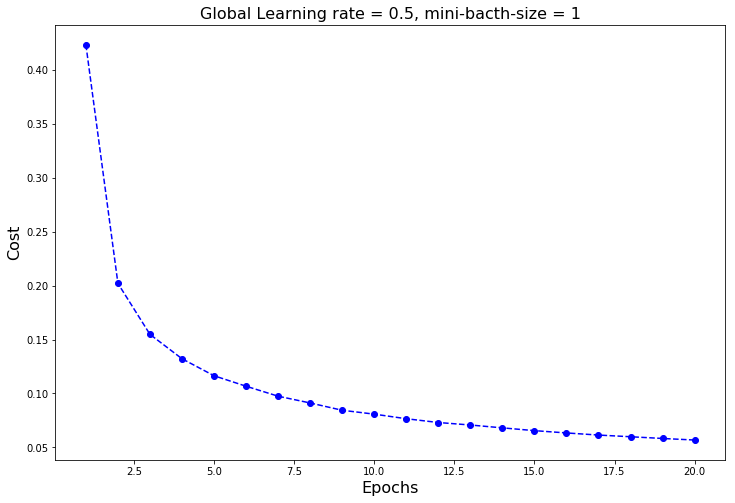

In [32]:
nnAdaGrad.plot_cost_function()

Accuracy = 1.00


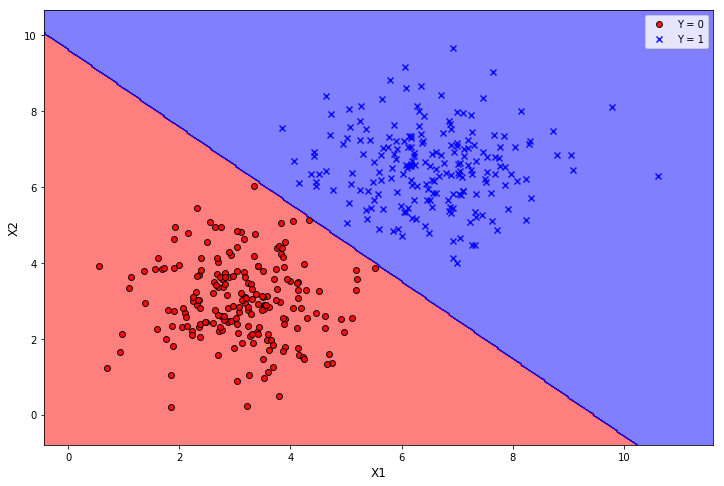

In [33]:
# plot decision regions
plot_decision_regions(X=X, Y=Y_target, classifier=nnAdaGrad)
# compute and print the accuracy
print("Accuracy = {:.2f}".format(compute_accuracy(X=X, Y=Y_target, classifier=nnAdaGrad)))

In [34]:
nnAdaGrad.show_parameters()

W1 = [[1.11650653 1.09670743]]
b1 = [[-10.54661979]]


### 2) RMSProp Algorithm
The $RMSProp$ algorithm modifies the AdaGrad algorithm, by changing the accomulation of gradients into an exponentialy weighted moving average, introducing a new hyperparameter $\rho$ that controls the length scale of moving average.

RMSProp Algorithm:

1) Define the global learning rate $\eta$ and decay hyperparameter $\rho$

2) initialize parameters $\theta$

3) Small constant $\delta$, usually $10^{-6}$, for numerical stability

4) for each epoch:

4.1) from the input data $X$ of shape $(n_0, n)$, randomly extract mini-batches, each one of m samples of shape $(n_0, m)$ and the 
    corresponding targets $(y^{(1)}, ..., y^{(m)})$ of shape $(n_L, n)$
   
4.2) for each mini-batch
     
4.2.1) compute the output $A_L$ of shape $(n_L, m)$ by the $forward\mbox{ }propagation$
        
4.2.2) compute the cost function: $\quad J\left(\theta\right) = \dfrac{1}{m}\sum_{k=1}^m\zeta\left(\theta, y^{(k)}, A_L^{(k)}\right)$
        
4.2.3) compute the gradients: $\quad g = \bigtriangledown_{\theta} J\left(\theta\right)$ 

4.2.4) accumulate squared gradients:  $\quad r \Rightarrow \rho r + \left(1 - \rho\right) g\odot g$

4.2.5) update the parameters (weights and biases):  $\quad \theta \Rightarrow \theta - \dfrac{\eta}{\sqrt{\delta + r}} g $


In [35]:
class NeuralNetworkRMSProb(NeuralNetworkAdaGrad):
    """
    
    Implementation of a General Neural Network based on RMSProp Algorithm 
    In case of classification, it can be used only for binary classification.
    
    Parameters:
    -----------
    Weights
        matrix of shape (n_l, n_l-1) for l-th layer
    Biases
        matrix of shape (n_l, 1) for l-th layer
    
    Hyperparameters:
    ----------------
    Learning rate:
        real number between 0 and 1 included in updating of parameters
    Number of layers:
        int number 
    Number of neurons for each layer:
        int number
    Activation function for each layer
    mini-batch size:
        int number
    rho : float number
        decay hyperparameter
        
    
    Attributes:
    -----------
    _layers : list
        Number of neurons for each layer. The first layer refers to the input data
    _activations: dictionary
        Name of activation function for each layer
    _loss: string
        Loss function
    _learning_rate : float 
        Learning rate (between 0.0 and 1.0)
    _random_state : int which is used 
        Random number generator seed for random weights initialization for each layer. It's used to have a
        reproducible and changable initialization.
    _weights : dictionary
        Matrix weights for each layer (shape = (n_l-1, n_l)). Each matrix is identified by a key like Wl
    _biases : dictionary
        Matrix biases for each layer (shape = (n_l, 1)). Each matrix is identified by a key like bl
    epochs : int
        Number of epochs (In this case it's equal to the number of iterations)
    cost_values : list
        Sum-of-loss function value averaged over all training samples in each epoch
    binary_classifier : boolean 
    classes : 1d-array 
        Values for two categories
    mini_batch_size : int
    _rW : dictionary
        accumulation of squared gradients respect to the weights for each layer 
    _rb : dictionary
        accumulation of squared gradients respect to the biases for each layer
    rho2 : float
   
   
    """
    # Constructor
    def __init__(self, layers, activations, loss, learning_rate=0.001, random_state=0, binary_classifier=False, mini_batch_size=16, rho2=0.9):
        """Constructor
        Input:
        ------
        layers : list
        activations : dictionary
        loss : string
        learning_rate : float (default: 0.001)
        random_state : int (default: 0)
        binary_classifier : boolean (default: False)
        mini_batch_size : int (default: 16)
        rho2 : float (default: 0.9)
        
        Output:
        -------
        None
        """
        super().__init__(layers, activations, loss, learning_rate, random_state, binary_classifier, mini_batch_size)
        self.rho2 = rho2
            
    
    def _update_sum_squared_gradients(self, dW, db):
        """
        Input:
        -------
        dW : dictionary containing gradients respect to the weights, array of shape (n_l, n_l-1) for each layer
        db : dictionary containing gradients respect to the biases, array of shape (n_l, 1) for each layer
        
        Output:
        -------
        None
        """
        # for each layer
        for l in range(1, len(self._layers)):
            # average weighted of the sum of squared gradients
            self._rW["rW" + str(l)] = self.rho2*self._rW["rW" + str(l)] + (1.-self.rho2)*np.power(dW[str(l)], 2)
            self._rb["rb" + str(l)] = self.rho2*self._rb["rb" + str(l)] + (1.-self.rho2)*np.power(db[str(l)], 2)
    
    
    def _update_parameters(self, caches, X, Y, small_delta=1e-6):
        """
        Input:
        ------
        caches : a list of tuples, a tuple for each layer containing (Z_l, A_l)
        X: 2d-array of shape (n_features, n_samples)
        Y : 2d-array of shape (n_L, n_samples)
        small_delta : a constant used for numerical stability
        
        Output:
        -------
        None
        """
        # compute the dictionaries of gradients dW and db
        dW, db = NeuralNetworkGD._backward_propagation(self, caches, X, Y)
        # update the sum of squared gradients
        self._update_sum_squared_gradients(dW, db)
        # for each layer
        for l in range(1, len(self._layers)):
            # update the weigths and biases
            lr_W = self._learning_rate/(np.sqrt(small_delta + self._rW["rW" + str(l)]))
            self._weights["W" + str(l)] += -np.multiply(lr_W, dW[str(l)])
            lr_b = self._learning_rate/(np.sqrt(small_delta + self._rb["rb" + str(l)]))
            self._biases["b" + str(l)] += -np.multiply(lr_b, db[str(l)])
    
    def plot_cost_function(self):
        """Method to plot cost function after the training of neural network"""
        plt.figure(figsize=(12,8))
        plt.plot(np.arange(1, self.epochs+1), self.cost_values, 'bo--')
        plt.title(r"Global Learning rate = {}, mini-bacth-size = {}, $\rho$ = {}".format(self._learning_rate,
                                                                                  self.mini_batch_size, self.rho2), size=16)
        plt.xlabel("Epochs", size=16)
        plt.ylabel("Cost", size=16)
        plt.show()


In [36]:
nnRMSProb = NeuralNetworkRMSProb(layers, activations, loss, learning_rate=0.05, random_state=0, binary_classifier=True, mini_batch_size=1, rho2=0.9)
nnRMSProb.fit(X, Y_target, epochs=80)

Epochs = 5,  Cost = 0.048414476281457036
Epochs = 10,  Cost = 0.02555213931097965
Epochs = 15,  Cost = 0.02204599586562387
Epochs = 20,  Cost = 0.018715470446706448
Epochs = 25,  Cost = 0.017506679102668316
Epochs = 30,  Cost = 0.014860701662102798
Epochs = 35,  Cost = 0.013891818840789818
Epochs = 40,  Cost = 0.010865908788288338
Epochs = 45,  Cost = 0.011854231645711472
Epochs = 50,  Cost = 0.012805691040632814
Epochs = 55,  Cost = 0.012669548542306331
Epochs = 60,  Cost = 0.01024374619145101
Epochs = 65,  Cost = 0.007959861633600226
Epochs = 70,  Cost = 0.011380015744767078
Epochs = 75,  Cost = 0.009065973856747254
Epochs = 80,  Cost = 0.008505786856944104


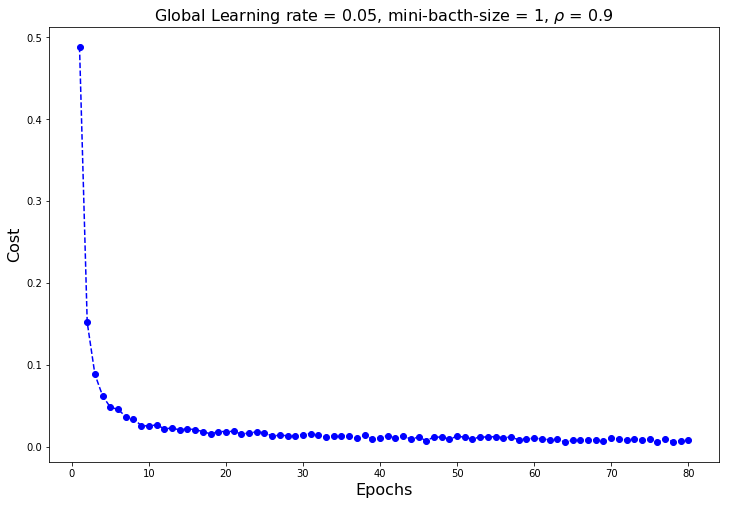

In [37]:
nnRMSProb.plot_cost_function()

Accuracy = 1.00


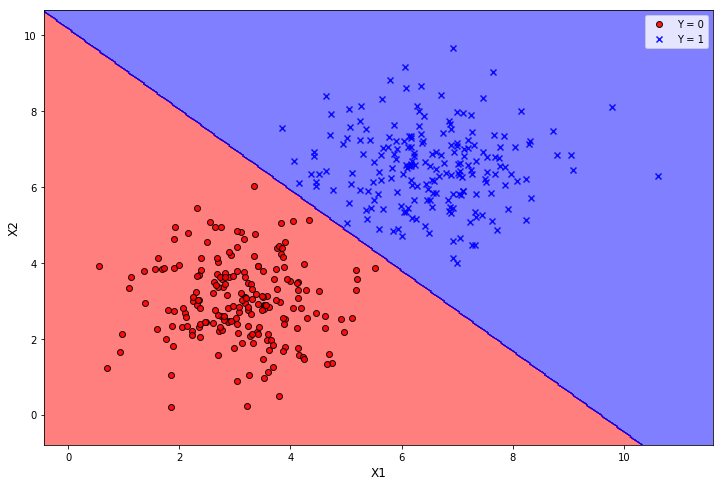

In [38]:
# plot decision regions
plot_decision_regions(X=X, Y=Y_target, classifier=nnRMSProb)
# compute and print the accuracy
print("Accuracy = {:.2f}".format(compute_accuracy(X=X, Y=Y_target, classifier=nnRMSProb)))

In [39]:
nnRMSProb.show_parameters()

W1 = [[3.9593022  3.72683756]]
b1 = [[-37.89473496]]


### 3) RMSProb algorithm with Nesterov momentum
The RMSProb algorithm with the Nesterov Momentum consists of a midification of the previous, as follows:

1) Define the global learning rate $\eta$, decay hyperparameter $\rho$ and momentum coefficient $\alpha$

2) initialize parameters $\theta$, velocity $V_\theta$ and accumulation variable $r = 0$

3) Small constant $\delta$, usually $10^{-7}$, for numerical stability

4) for each epoch:

4.1) from the input data $X$ of shape $(n_0, n)$, randomly extract mini-batches, each one of m samples of shape $(n_0, m)$ and the 
    corresponding targets $(y^{(1)}, ..., y^{(m)})$ of shape $(n_L, n)$
   
4.2) for each mini-batch

4.2.1) apply interim update of parameters: $\quad \theta \Rightarrow \theta + \alpha V_\theta = \bar{\theta}$
     
4.2.2) compute the output $A_L$ of shape $(n_L, m)$ by the $forward\mbox{ }propagation$
        
4.2.3) compute the cost function: $\quad J\left(\bar{\theta}\right) = \dfrac{1}{m}\sum_{k=1}^m\zeta\left(\bar{\theta}, y^{(k)}, A_L^{(k)}\right)$
        
4.2.4) compute the gradients: $\quad g = \bigtriangledown_{\bar{\theta}} J\left(\bar{\theta}\right)$ 

4.2.5) accumulate squared gradients:  $\quad r \Rightarrow \rho r + \left(1 - \rho\right) g\odot g$

4.2.6) update velocity: $V_\theta \Rightarrow \alpha V_\theta -\dfrac{\eta}{\sqrt{\delta + r}} \odot g$

4.2.7) update the parameters (weights and biases):  $\quad \theta \Rightarrow \theta + V_\theta$

In [40]:
class NeuralNetworkRMSProbNestMom(NeuralNetworkRMSProb, NeuralNetworkSGDNestMom):
    """
    
    Implementation of a General Neural Network based on RMSProp Algorithm with Nesterov momentum 
    In case of classification, it can be used only for binary classification.
    
    Parameters:
    -----------
    Weights
        matrix of shape (n_l, n_l-1) for l-th layer
    Biases
        matrix of shape (n_l, 1) for l-th layer
    
    Hyperparameters:
    ----------------
    Learning rate:
        real number between 0 and 1 included in updating of parameters
    Number of layers:
        int number 
    Number of neurons for each layer:
        int number
    Activation function for each layer
    mini-batch size:
        int number
    rho : float number
        decay hyperparameter
        
    
    Attributes:
    -----------
    _layers : list
        Number of neurons for each layer. The first layer refers to the input data
    _activations: dictionary
        Name of activation function for each layer
    _loss: string
        Loss function
    _learning_rate : float 
        Learning rate (between 0.0 and 1.0)
    _random_state : int which is used 
        Random number generator seed for random weights initialization for each layer. It's used to have a
        reproducible and changable initialization.
    _weights : dictionary
        Matrix weights for each layer (shape = (n_l-1, n_l)). Each matrix is identified by a key like Wl
    _biases : dictionary
        Matrix biases for each layer (shape = (n_l, 1)). Each matrix is identified by a key like bl
    epochs : int
        Number of epochs (In this case it's equal to the number of iterations)
    cost_values : list
        Sum-of-loss function value averaged over all training samples in each epoch
    binary_classifier : boolean 
    classes : 1d-array 
        Values for two categories
    mini_batch_size : int
    _rW : dictionary
        accumulation of squared gradients respect to the weights for each layer 
    _rb : dictionary
        accumulation of squared gradients respect to the biases for each layer
    rho2 : float
    _v_dW : dictionary
        velocity related to weights
    _v_db : dictionary
        velocity related to biases
   
   
    """
    # Constructor
    def __init__(self, layers, activations, loss, learning_rate=0.001, random_state=0, binary_classifier=False, mini_batch_size=16, alpha=0.9, rho2=0.9):
        NeuralNetworkRMSProb.__init__(self, layers, activations, loss, learning_rate, random_state, binary_classifier, mini_batch_size, rho2)
        NeuralNetworkSGDNestMom.__init__(self, layers, activations, loss, learning_rate, random_state, binary_classifier, mini_batch_size, alpha)
    
    
    def _update_parameters(self, caches, X, Y, small_delta=1e-6):
        """
        Input:
        --------
        caches : a list of tuples, a tuple for each layer containing (Z_l, A_l)
        X: 2d-array of shape (n_features, n_samples)
        Y : 2d-array of shape (n_L, n_samples)
        small_delta : a constant used for numerical stability
        
        Outputs:
        ---------
        None
        """
        # compute the dictionaries of gradients dW and db
        dW, db = NeuralNetworkGD._backward_propagation(self, caches, X, Y)
        # update the sum of squared gradients
        NeuralNetworkRMSProb._update_sum_squared_gradients(self, dW, db)
        
        # for each layer
        for l in range(1, len(self._layers)):
            # get the previous values of parameters
            self._weights["W" + str(l)] -= self.alpha*self._v_dW["v_dW" + str(l)] 
            self._biases["b" + str(l)] -= self.alpha*self._v_db["v_db" + str(l)] 
            # update the velocities gradients
            lr_W = self._learning_rate/(np.sqrt(small_delta + self._rW["rW" + str(l)]))
            self._v_dW["v_dW" + str(l)] = self.alpha*self._v_dW["v_dW" + str(l)] - np.multiply(lr_W, dW[str(l)])
            lr_b = self._learning_rate/(np.sqrt(small_delta + self._rb["rb" + str(l)]))
            self._v_db["v_db" + str(l)] = self.alpha*self._v_db["v_db" + str(l)] - np.multiply(lr_b, db[str(l)])
            # update the weigths and biases
            self._weights["W" + str(l)] += self._v_dW["v_dW" + str(l)]
            self._biases["b" + str(l)] += self._v_db["v_db" + str(l)]
            
    
    def fit(self, X, Y_target, epochs):
        """
        Input:
        X :  2d-array of shape (n_features, n_samples)
        Y_target : 2d-array of shape (n_L, n_samples)
        epochs : integer that represents the number of epochs
        
        Outputs:
        self : the same object 
        """
        # Initialize parameters
        NeuralNetworkGD.initialize_parameters(self)
        # initialize the sum of squared of gradients
        NeuralNetworkAdaGrad._initialize_sum_squared_gradients(self)
        # initialize the velocity
        NeuralNetworkSGDMom._initialize_velocity_gradients(self)
        
        # initialize attribute epochs
        self.epochs = epochs
        # initialize a list of errors
        self.cost_values = []
        
        # if this neural network is for binary classification
        if self.binary_classifier == True:
            # extract the targets values for two categories
            self.classes = np.unique(Y_target)
        
        # for each epoch
        for k in range(1,self.epochs+1):
            # get the lists of mini-batches
            list_X_mini_batch, list_Y_mini_batch = self._get_list_mini_batches(X, Y_target)
            # for each mini-batch
            cost = 0.
            for X_mini_batch, Y_mini_batch in zip(list_X_mini_batch, list_Y_mini_batch):
                # apply the method _interim_update_parameters from the class NeuralNetworkSGDNestMom
                NeuralNetworkSGDNestMom._interim_update_parameters(self)
                # apply the forward-propagation
                caches, Y_pred = NeuralNetworkGD._forward_propagation(self, X_mini_batch)
                # compute the loss function
                cost += NeuralNetworkGD._cost_function(self, Y_mini_batch, Y_pred)
                # apply the backward-propagation and update the weights and biases, based on the RMSProp algorithm with Nesterov momentum
                self._update_parameters(caches, X_mini_batch, Y_mini_batch)
                
            # compute mean of cost and appends it into the list cots_values
            cost = cost/len(list_X_mini_batch)
            self.cost_values.append(cost)
            # show the cost function value
            if (k%5 == 0):
                print("Epochs = {},  Cost = {}".format(k, cost))
            
        # return the same object
        return self
    
    def plot_cost_function(self):
        """Method to plot cost function after the training of neural network"""
        plt.figure(figsize=(12,8))
        plt.plot(np.arange(1, self.epochs+1), self.cost_values, 'bo--')
        plt.title(r"Global Learning rate = {}, mini-bacth-size = {}, $\alpha$ = {}, $\rho$ = {}".format(self._learning_rate,
                                                                                  self.mini_batch_size, self.alpha, self.rho2), size=16)
        plt.xlabel("Epochs", size=14)
        plt.ylabel("Cost", size=14)
        plt.show()


Now, creating an object from such class and trying different values of hyperparameters, we'll get:

In [41]:
nnRMSProbNestMom = NeuralNetworkRMSProbNestMom(layers, activations, loss, learning_rate=0.01, random_state=1, binary_classifier=True, mini_batch_size=2, alpha=0.9, rho2=0.9)
nnRMSProbNestMom.fit(X, Y_target, epochs=20)

Epochs = 5,  Cost = 0.045186759152518914
Epochs = 10,  Cost = 0.027754320446408305
Epochs = 15,  Cost = 0.021841707176094446
Epochs = 20,  Cost = 0.018038499916836218


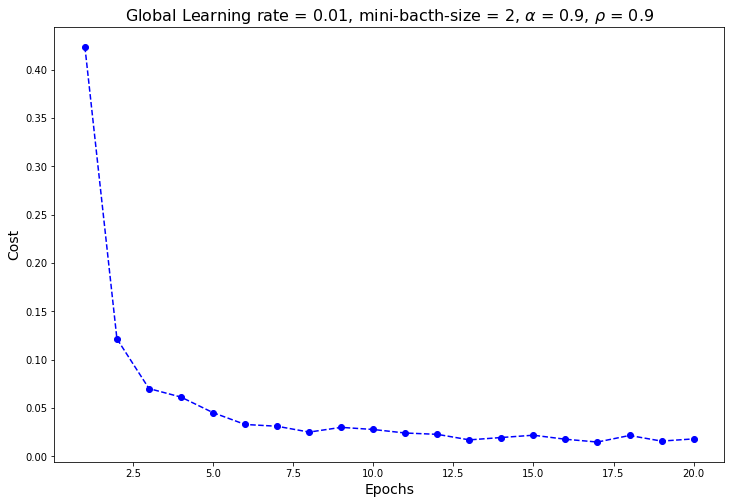

In [42]:
nnRMSProbNestMom.plot_cost_function()

Accuracy = 1.00


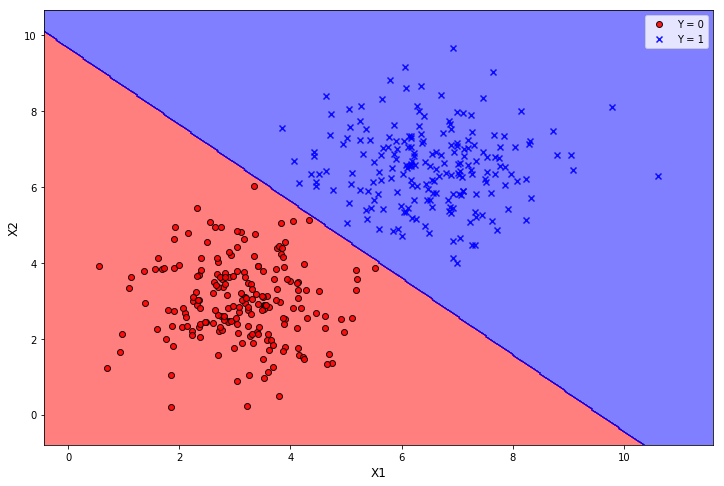

In [43]:
# plot decision regions
plot_decision_regions(X=X, Y=Y_target, classifier=nnRMSProbNestMom)
# compute and print the accuracy
print("Accuracy = {:.2f}".format(compute_accuracy(X=X, Y=Y_target, classifier=nnRMSProbNestMom)))

In [44]:
nnRMSProbNestMom.show_parameters()

W1 = [[2.6760069  2.64807193]]
b1 = [[-25.58158183]]


### 4) Adam
$Adam$ is another adaptive learning rate algorithm, similar to RMSProp. In addition to storing an exponentially decaying average of squared gradients $\textbf{r}$ like RMSProp, Adam also keeps an exponentially decaying average of gradients $\textbf{s}$ similar to momentum, as follows:

$$
\rho_1 s + \left(1 - \rho_1\right) g \\
\rho_2 r + \left(1 - \rho_2\right) g\odot g
$$

where $s$ and $r$ are estimates of the first moment (mean) and the second moment (variance) of the gradients.
Furthermore, Adam includes bias correction to the estimates of both the first and second moment to account for their initialization to the origin

$$
\hat{s} = \dfrac{s}{1 - \rho_1^t}\\
\hat{r} = \dfrac{r}{1 - \rho_2^t}
$$

then they are used to update parameters, just as we have seen in RMSProp

$$
\theta - \eta\dfrac{\hat{s}}{\delta + \sqrt{\hat{r}}}
$$

So the Adam algorithm is the following:

1) Define the global learning rate $\eta$, decay hyperparameters $\rho_1$ and $\rho_2$ (usually $0.9$ and $0.999$)

2) Small constant $\delta$, usually $10^{-8}$, for numerical stability

3) initialize parameters $\theta$

4) initialize first and second moment variables $s = 0$ $r = 0$

5) initialize time step $t = 0$

6) for each epoch:

6.1) from the input data $X$ of shape $(n_0, n)$, randomly extract mini-batches, each one of m samples of shape $(n_0, m)$ and the 
    corresponding targets $(y^{(1)}, ..., y^{(m)})$ of shape $(n_L, n)$
   
6.2) for each mini-batch
     
6.2.1) compute the output $A_L$ of shape $(n_L, m)$ by the $forward\mbox{ }propagation$
        
6.2.2) compute the cost function: $\quad J\left(\theta\right) = \dfrac{1}{m}\sum_{k=1}^m\zeta\left(\theta, y^{(k)}, A_L^{(k)}\right)$
        
6.2.3) compute the gradients: $\quad g = \bigtriangledown_{\theta} J\left(\theta\right)$ 

6.2.4) update first moment: $\quad s \Rightarrow \rho_1 s + \left(1 - \rho_1\right) g$

6.2.5) update second moment: $\quad r \Rightarrow \rho_2 r + \left(1 - \rho_2\right) g\odot g$

6.2.6) increment time step: $\quad t \Rightarrow t + 1$

6.2.7) correct bias in first moment: $\quad s \Rightarrow \dfrac{s}{1 - \rho_1^t} = \hat{s}$

6.2.8) correct bias in second moment: $\quad r \Rightarrow \dfrac{r}{1 - \rho_2^t} = \hat{r}$

6.2.9) update the parameters (weights and biases):  $\quad \theta \Rightarrow \theta - \eta\dfrac{\hat{s}}{\delta + \sqrt{\hat{r}}}$

In [45]:
class NeuralNetworkAdam(NeuralNetworkRMSProb):
    """
    
    Implementation of a General Neural Network based on Adam Algorithm 
    In case of classification, it can be used only for binary classification.
    
    Parameters:
    -----------
    Weights
        matrix of shape (n_l, n_l-1) for l-th layer
    Biases
        matrix of shape (n_l, 1) for l-th layer
    
    Hyperparameters:
    ----------------
    Learning rate:
        real number between 0 and 1 included in updating of parameters
    Number of layers:
        int number 
    Number of neurons for each layer:
        int number
    Activation function for each layer
    mini-batch size:
        int number
    rho1 : float number
        decay hyperparameter for first moment
    rho2 : float number
        decay hyperparameter for second moment
        
    
    Attributes:
    -----------
    _layers : list
        Number of neurons for each layer. The first layer refers to the input data
    _activations: dictionary
        Name of activation function for each layer
    _loss: string
        Loss function
    _learning_rate : float 
        Learning rate (between 0.0 and 1.0)
    _random_state : int which is used 
        Random number generator seed for random weights initialization for each layer. It's used to have a
        reproducible and changable initialization.
    _weights : dictionary
        Matrix weights for each layer (shape = (n_l-1, n_l)). Each matrix is identified by a key like Wl
    _biases : dictionary
        Matrix biases for each layer (shape = (n_l, 1)). Each matrix is identified by a key like bl
    epochs : int
        Number of epochs (In this case it's equal to the number of iterations)
    cost_values : list
        Sum-of-loss function value averaged over all training samples in each epoch
    binary_classifier : boolean 
    classes : 1d-array 
        Values for two categories
    mini_batch_size : int
    _rW : dictionary
        accumulation of squared gradients respect to the weights for each layer 
    _rb : dictionary
        accumulation of squared gradients respect to the biases for each layer
    rho2 : float
    """
    
    # Constructor
    def __init__(self, layers, activations, loss, learning_rate=0.001, random_state=0, binary_classifier=False, mini_batch_size=16, rho1=0.9, rho2=0.99):
        """Constructor
        Input:
        ------
        layers : list
        activations : dictionary
        loss : string
        learning_rate : float (default: 0.001)
        random_state : int (default: 0)
        binary_classifier : boolean (default: False)
        mini_batch_size : int (default: 16)
        rho1 : float (default: 0.9)
        rho2 : float (default: 0.99)
        
        Output:
        -------
        None
        """
        super().__init__(layers, activations, loss, learning_rate, random_state, binary_classifier, mini_batch_size, rho2)
        self.rho1 = rho1
        
    def _initialize_first_moment(self):
        """Method to initialize the first moment of gradients"""
        # initialize two dictionaries
        self._sW = {}
        self._sb = {}
        # for each layer
        for l in range(1, len(self._layers)):
            # get the length of the current and previous layers
            n_l = self._layers[l]
            n_l_prev = self._layers[l-1]
            # initialize the first moment related to the gradients
            self._sW["sW" + str(l)] = np.zeros((n_l, n_l_prev))
            self._sb["sb" + str(l)] = np.zeros((n_l,1))
            
    
    def _update_first_moment(self, dW, db):
        """
        Input:
        ------
        dW : dictionary containing gradients respect to the weights, array of shape (n_l, n_l-1) for each layer
        db : dictionary containing gradients respect to the biases, array of shape (n_l, 1) for each layer
        
        Output:
        -------
        None
        """
        # for each layer
        for l in range(1, len(self._layers)):
            # exponential weighted average of gradients
            self._sW["sW" + str(l)] = self.rho1*self._sW["sW" + str(l)] + (1.-self.rho1)*dW[str(l)]
            self._sb["sb" + str(l)] = self.rho1*self._sb["sb" + str(l)] + (1.-self.rho1)*db[str(l)]
    
    
    def _correct_bias_first_moment(self, step):
        """
        Input:
        -------
        step : int
        
        Output:
        -------
        None
        """
        # for each layer
        for l in range(1, len(self._layers)):
            # exponential weighted average of gradients
            self._sW["sW" + str(l)] = self._sW["sW" + str(l)]/(1. - self.rho1**step)
            self._sb["sb" + str(l)] = self._sb["sb" + str(l)]/(1. - self.rho1**step)
            
    def _correct_bias_second_moment(self, step):
        """
        Input:
        -------
        step : int
        
        Output:
        -------
        None
        """
        # for each layer
        for l in range(1, len(self._layers)):
            # exponential weighted average of gradients
            self._rW["rW" + str(l)] = self._rW["rW" + str(l)]/(1. - self.rho2**step)
            self._rb["rb" + str(l)] = self._rb["rb" + str(l)]/(1. - self.rho2**step)
        
    
    def _update_parameters(self, caches, X, Y, step, small_delta=1e-8):
        """
        Input:
        --------
        caches : a list of tuples, a tuple for each layer containing (Z_l, A_l)
        X: 2d-array of shape (n_features, n_samples)
        Y : 2d-array of shape (n_L, n_samples)
        small_delta : a constant used for numerical stability
        step : int
        
        Outputs:
        ---------
        None
        """
        # compute the dictionaries of gradients dW and db
        dW, db = NeuralNetworkGD._backward_propagation(self, caches, X, Y)
        # update first moment
        self._update_first_moment(dW, db)
        # update second moment
        super()._update_sum_squared_gradients(dW, db)
        
        # for each layer
        for l in range(1, len(self._layers)):
            # correct bias in the first moment
            sW_corrected = self._sW["sW" + str(l)]/(1. - self.rho1**step)
            sb_corrected = self._sb["sb" + str(l)]/(1. - self.rho1**step)
            # correct bias in the second moment
            rW_corrected = self._rW["rW" + str(l)]/(1. - self.rho2**step)
            rb_corrected = self._rb["rb" + str(l)]/(1. - self.rho2**step)
            # update the weigths and biases
            self._weights["W" + str(l)] += -self._learning_rate*np.divide(sW_corrected, (small_delta + np.sqrt(rW_corrected)))
            self._biases["b" + str(l)] += -self._learning_rate*np.divide(sb_corrected, (small_delta + np.sqrt(rb_corrected)))
            
    
    def fit(self, X, Y_target, epochs):
        """
        Input:
        ------
        X :  2d-array of shape (n_features, n_samples)
        Y_target : 2d-array of shape (n_L, n_samples)
        epochs : int
            number of epochs
        
        Output:
        -------
        self : the same object 
        """
        # Initialize parameters
        NeuralNetworkGD.initialize_parameters(self)
        # initialize exponential weighted average of gradients (first gradient)
        self._initialize_first_moment()
        # initialize the sum of squared of gradients (second moment)
        NeuralNetworkAdaGrad._initialize_sum_squared_gradients(self)
        
        
        # initialize attribute epochs
        self.epochs = epochs
        # initialize a list of errors
        self.cost_values = []
        
        # if this neural network is for binary classification
        if self.binary_classifier == True:
            # extract the targets values for two categories
            self.classes = np.unique(Y_target)
        
        # initialize time step to zero
        t = 0
        # for each epoch
        for k in range(1,self.epochs+1):
            # get the lists of mini-batches
            list_X_mini_batch, list_Y_mini_batch = self._get_list_mini_batches(X, Y_target)
            
            # for each mini-batch
            cost = 0.
            for X_mini_batch, Y_mini_batch in zip(list_X_mini_batch, list_Y_mini_batch):
                # apply the forward-propagation
                caches, Y_pred = NeuralNetworkGD._forward_propagation(self, X_mini_batch)
                # compute the loss function
                cost += NeuralNetworkGD._cost_function(self, Y_mini_batch, Y_pred)
                # update the time step 
                t += 1
                # apply the backward-propagation and update the weights and biases, based on the Adam algorithm
                self._update_parameters(caches, X_mini_batch, Y_mini_batch, step=t)
                
            # compute mean of cost and appends it into the list cots_values
            cost = cost/len(list_X_mini_batch)
            self.cost_values.append(cost)
            # show the cost function value
            if (k%5 == 0):
                print("Epochs = {},  Cost = {}".format(k, cost))
            
        # return the same object
        return self

    def plot_cost_function(self):
        """Method to plot cost function after the training of neural network"""
        plt.figure(figsize=(12,8))
        plt.plot(np.arange(1, self.epochs+1), self.cost_values, 'bo--')
        plt.title(r"Global Learning rate = {}, mini-bacth-size = {}, $\rho_1$ = {}, $\rho_2$ = {}".format(self._learning_rate,
                                                                                  self.mini_batch_size,self.rho1, self.rho2), size=16)
        plt.xlabel("Epochs", size=14)
        plt.ylabel("Cost", size=14)
        plt.show()

In [46]:
nnAdam = NeuralNetworkAdam(layers, activations, loss, learning_rate=0.01, random_state=0, binary_classifier=True, mini_batch_size=1, rho1=0.9, rho2=0.999)
nnAdam.fit(X, Y_target, epochs=20)

Epochs = 5,  Cost = 0.23459904776721818
Epochs = 10,  Cost = 0.11784151803487994
Epochs = 15,  Cost = 0.07343005159874964
Epochs = 20,  Cost = 0.05414014197118716


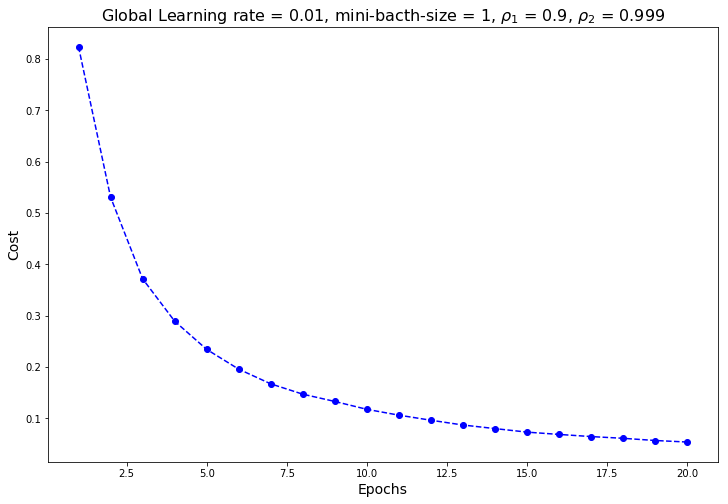

In [47]:
nnAdam.plot_cost_function()

Accuracy = 1.00


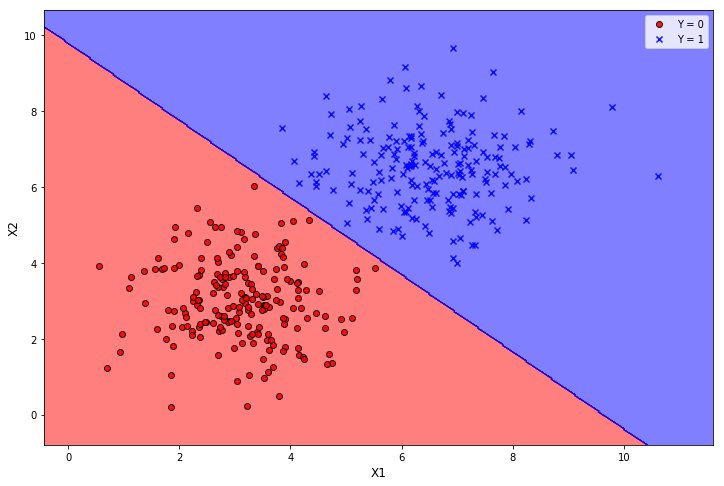

In [48]:
# plot decision regions
plot_decision_regions(X=X, Y=Y_target, classifier=nnAdam)
# compute accuracy and print it
print("Accuracy = {:.2f}".format(compute_accuracy(X=X, Y=Y_target, classifier=nnAdam)))

In [49]:
nnAdam.show_parameters()

W1 = [[1.1469195  1.12794513]]
b1 = [[-11.03693011]]


A classes diagram to show how the algorithms that we've just implemented are related among them, is showed.

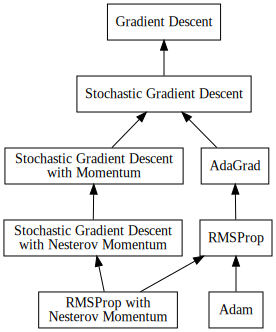

In [50]:
cl = graphviz.Digraph(name='Class Algorithm Diagram')

cl.graph_attr['rankdir'] = 'TB'
cl.node(name='GD', label='Gradient Descent', shape='box')
cl.node(name='SGD', label='Stochastic Gradient Descent', shape='box')
cl.node(name='SGDMom', label='Stochastic Gradient Descent \n with Momentum', shape='box')
cl.node(name='SGDNestMom', label='Stochastic Gradient Descent \n with Nesterov Momentum', shape='box')
cl.node(name='AG', label='AdaGrad', shape='box')
cl.node(name='RMSP', label='RMSProp', shape='box')
cl.node(name='RMSPNM', label='RMSProp with \n Nesterov Momentum', shape='box')
cl.node(name='Adam', label='Adam', shape='box')

cl.edge('GD', 'SGD')
cl.edge('SGD', 'SGDMom')
cl.edge('SGDMom', 'SGDNestMom')
cl.edge('SGD','AG')
cl.edge('AG','RMSP')
cl.edges([('RMSP','RMSPNM'), ('SGDNestMom','RMSPNM')])
cl.edge('RMSP','Adam')
cl.edge_attr['dir'] = 'back'

cl

Now there is the following question: which is the best algorithm? Which algorithm should one choose? There is no  exact answer. We can say the choice depends on the kind of data and case. Anyway among these algorithms the most popular in actively use are: SGD, SGD with Momentum, RMSProp, RMSProp with Momentum and Adam.

For more details and explanation of these algorithm you can see on the famous Ian Goodfellow's book "$Deep\mbox{ }Learning$" or Micheal Nielsen's book $"Neural\mbox{ }Network\mbox{ }and\mbox{ }Deep\mbox{ }Learning"$.